# <center>Capstone Project </center> 
---
## <center> Flight Ticket Price Prediction</center>
**<center>Rohan Takey <center>**
<center>rohantakey246@gmail.com</center> 

![image](airplane.png)

### <center>Overview</center>
* **Basic Idea :**<br>
Airline Industry is the one of the biggest Industries and the most variable term in airline is the pricing of a airline ticket.flight tickets related to different paramters that makes certain changes in rising and falling of prices.consider a flight from Point A to Point B, it is not neccessary that the price for the journey will alaways be same for a long period of time which we see in the Fare of buses and trains.Flight prices have uncertanity with airline of the flight , duration of travel , the day of travel and many others.
From this project we analyise this parameters and their effect on the ticket price.we also devolpe a model to predict this uncertaninty in flight Ticket pricing and try to predict possible ticket prices.
   **This can be useful for commercial airlines to decide their flight pricing as well as for personal use to get a possible idea about Fare and Planning a journey***


* **Objective :**<br>Machine learning can be used to detect the pattern in the historical data and can be usefull to create a prediction.Utilizing the Data analysing and Machine Learning to solve flight price prediction problem.<br>


* **Problem Statement :**<br>To predict the airline ticket price for a journey.


* **Motivation :**<br>It is alaways handy to plan a journey before the day of travel.it will be for economically efficent and benifical to avoide surge pricing.But industry like aviation has problem with uncertaninty.A good Machine learning model might useful to solve this problem.


* **Project Scope :**<br>This  project will analyise the historical data of Flight ticket pricing,take insight from that data to understand more about aviation industry by the view of ticket pricing.Creating relevent data from already available data is one of the part of the project.at the last stage of project will be creating a machine learning model that understand this problem to give us desired output.


* **Working Methodology :**
    - Primary Task is to Understand Data and finding anomalies in data.
    - Feature Engineering.
    - Exploratory data analysis.
    - Machine Learning  Preprocessing.
    - Building Machine Learning model.
    - Model Evaluation.
    - Model validation.
    - Cross validation.
    - Tuning Model.
    
    
* **Data Collection**
    - The dataset I took from kaggle.link for the dataset is [here](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh)


* **Technical Aspect :**<br>
    - [Python v1.2.4](https://www.python.org/) Programming Langauge for this Notebook.
    - [Pandas v1.21.2](https://pandas.pydata.org/) Python Data Analysis Library.
    - [Sklearn v0.24.2](https://scikit-learn.org/stable/) Machine Learning handling in Python.
    - [Geopy v2.2.0](https://pypi.org/project/geopy/) Geocoding Solution for Python. 
    - [Scipy v1.6.3](https://scipy.org/) Scintific Calculation in python
    - [Matplotlib v3.4.2](https://matplotlib.org/) creating static, animated, and interactive visualizations in Python.
    - [Seaborn v0.11.1](https://seaborn.pydata.org/) Python data Visulization based on matplotlib.
    - [re v2.2.1](https://docs.python.org/3/library/re.html) Operating Regex operation in python.
    - [Statsmodels 0.12.2](https://www.statsmodels.org/stable/index.html) # Statsmodels is another machine learning library for python.
    
    
- **Model Evaluation Based criteria**
    
   |Criteria|Formula|
   |--------|-------|
   |Coefficent of Determination$R^2$| $$1-\frac{RSS}{TSS}$$ |
   |RMSE|$$\sqrt{\frac{1}{n}\Sigma_{i=1}^{n}(y_i – \hat{y_{i}})^2}$$|
   
   


        


### Table Of Content

* [**Data Preprocessing**](#Data-Preprocessing)
    * [Prerequisite](#Prerequisite)
    * [STatistical Analysis-The Data](#Statistical-Analysis-The-Data)
    * [Anomoly detection and Treatment](#Anomoly-Detection-and-Treatment)
        * [Data validity Check](#Data-Validity-Check)
        * [Null Check](#Null-Check)
        * [Outliers Check](#Outliers-Check)
* [**Feature Engineering**](#Feature-Engineering)
* [**EDA And Visulization**](#EDA-And-Visulization)
* [**Machine Learning Models**](#Machine-Learning-Models)
    * [Model Preprocessing](#Model-Preprocessing)
    * [Models Building](#Models-Building)
        * [1.Ordinal Least Square](#Ordinal-Least-Square)
            * [Linear Regression Assumption](#Linear-Regression-Assumption-Check)
        * [2.Decision Tree Regressor](#Decision-Tree-Regressor)
        * [3.KNN Regressor](#K-Nearest-Neighbors-Regressor)
    * [Ensamble Models](#Ensamble-Models)
        * [4.Random forest Regressor](#Random-Forest-Regressor)
        * [5.Gradient Boosting Regressor](#Gradient-Boosting-Regressor)
        * [6.AdaBoost Regressor(Decision Tree)](#AdaBoost-Regressor-Decision-Tree)
    * [Model Performance Evaluation](#Model-Performance-Evaluation)
    * [Cross Validation](#Cross-Validation)
    * [Hyperparameter Tuning of best model](#Hyperparamter-Tuning)
    * [Optimized Gradient Boosting Algorithms](#Optimized-Gradient-Boosting-Algorithms)
        * [XGBoost Regressor](#XGBoost-Regressor)
        * [Light Gradient Boost Regressor](#Light-Gradient-Boost-Regressor)
    
* [**Summary**](#Summary)
* [**Conclusion**](#Conclusion)
* [**Future Scope**](#Future-Scope)
* [**Reference**](#Reference)

### <center>Data Preprocessing</center>

#### Prerequisite

In [1]:
## Installing Prerequisites
#!pip install pandas
#!pip install numpy
#!pip install regex
#conda install -c conda-forge geopy (anaconda prompt)   # Getting geographical distance from co-ordinates.
#pip install matplotlib
#pip install seaborn
#pip install scipy
#!pip install statmodels    # For OLS model
#!pip install openpyxl      #Pandas supporting library to read data from xlsx files.
#!pip install xgboost
#!pip install catboost
#!pip install jobib

In [2]:
# Libraries For data Handling

import pandas as pd # Handling data into DataFrame format
import numpy as np # Handling numerical functions
import re # Handling text data 
import geopy.distance # Handling geographical data
from scipy.stats import norm, skew , probplot,zscore #Finding normal , skewness of feature and probplot to see the 
                                                     #distribution of data.and zscore for outlier treatment.
from collections import Counter #counting datapoints and values in a features
import warnings # Clearing Notebook version warnings from the notebook
import matplotlib.pyplot as plt # Handling Plots and plot dimensions in notebook
import seaborn as sns # Handling Visulization tasks
import statsmodels.tsa.api as smt #autocorrelation plot-correlogram


# Machine Learning Libraries 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm # Beacause it gives summary in a proper format.
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor   # Decision Tree Regressor
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbours Regressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score,KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import joblib # To save the model


# Setting Default Values for notebook
pd.options.display.max_columns=None # Pandas to show all the columns
warnings.filterwarnings('ignore') # setting warnings status to be ignored
%matplotlib inline 
plt.rcParams['font.size']=15 # Font size of all fonts in plot
plt.style.use('seaborn-darkgrid') # Plot background style
palette=sns.color_palette('husl',10) # color pallete for multicolor plot

In [3]:
# Reading datasets as a excel file from pandas read_excel function.
df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

#### Statistical Analysis-The Data

Analysis of the data by statistical approach.

In [4]:
# Primary Data Inspection.
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**Attribute Information**
- **Airline** : Name of the Flight service provider Airline.
- **Date_of_Journey** : Date of the flight Journey.
- **Source** : Boarding Airport.
- **Destination** : Destination Airport.
- **Route** : Route of the flight , if it's a connecting flight.direct flight represent only source and destination.
- **Dep_Time** : Time of flight Departure from source airport.
- **Arrival_Time** : Time of Arrival of flight at destination airport.
- **Duration** : Duration of journey including time at connecting airports.
- **Total_Stops** : The number of connecting airports in the flight route.
- **Additional info** : special Instruction by Airlines for the respetive Flight.
- **Price** : (Target) The Fare of the respective journey flight on that day.

**Attribute Data Extraction Plan**
1. Date_of_Journey : Date cannot be processed directly.So extracting information like *day* , *month* , *year*  from the date is required.
2. Route : From Route its possible to find the path of a flight and the total Flight  *distance*  the journey is covered.
3. Dep_Time : A time variable in travel domain is not fixed every time.so converting it to a part of day like *morning,evening,Afternoon and night* can be created.
4. Duration : The Duration is in HH:MM Format. A continues variable having duration in *Minutes* can be genrated.
5. Total_Stops: *Number of Stops* is an numerical attribute can be extracted with text processing from this feature.
6. Price : As a numerical variable , *statistical* checks are required.

In [6]:
# Scema of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- There are *10 Independat features* and *1 Dependant feature*.
- **Price** is the Target-Dependant feature of the data.
- Non-Null Count is incosisntant , *Null check* require.
- Dtype of all the independant features are *Object* where as target is *Int*.
- From Data it can be observed that *feature engineering* is required to extract information from data.

In [7]:
# dataset Disription - catogorical Vairbles
df.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [8]:
# dataset Disription - Nnumerical Varibale
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


- Categorical data shows 10683 count of datapoints.
- Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration have high number of unique values.This feature most importantly needs to be engineered to use in right way.
- Airline,Source,Destination,Total_Stops , Additional_Info arre the features that can be Encoded using one-hot-encoding .
- Delhi and Cochin is themost frequent flight.where as the Route Delhi-Bombay-Cochin is the most frequent flight route.
- in terms of Duration and Dep_Time most freqent time is at evening and duration is as near as 3 hrs per flight.
- The Target feature shows standerd devation and mean values as a float.It defines a Continueos Numerical value Feature.This means a **Linear Regression Machine Learning Model** Will be perfect for predicting the target.

In [9]:
# Target Variable Analysis
def Numerical_Feat_Analysis(df):
    # defining figure outline
    f = plt.figure(facecolor='whitesmoke', figsize=(20, 5))

    # defining figure dimensions
    ax_left = f.add_axes([0,0,.2,1], facecolor='whitesmoke') # Figure cell color and axis 
    ax_left.axis('off') # No axis required for showing text.
    ax_left.text(.4, .9, 'Price', color='crimson', size=22, weight='bold')
    ax_left.text(.1, .8, f'Skew: {df.Price.skew():.2f}', size=20)
    ax_left.text(.1, .7, f'kurt: {abs(df.Price.kurt()):.2f}', size=20)
    ax_left.text(.1, .6, f'missing count: {df.Price.isnull().sum()}', size=20)
    ax_left.text(.1, .5,f'Observation Counts :{len(df.Price)}',size=20)
    ax_left.text(.1, .4, 'conclusion: ', color='crimson', size=20)
    if df.Price.skew()>0.5:
        ax_left.text(.1, .3, 'Positive Skewness', size=15)
    else:
        ax_left.text(.1, .3, 'No Skewness Observed-\nFeature suitable for processing', size=15)
     

    # Distibution plot
    ax_right1 = f.add_axes([0.25,0,.3,.8], facecolor='whitesmoke')
    sns.distplot(df.Price, fit=norm, ax=ax_right1)
    plt.axvline(x=df['Price'].mean(),color='r')

    ax_right1.spines[['top', 'right']].set_visible(False)
    ax_right1.set_title('histogram', color='crimson', weight='bold', size=10)

    ax_right2 = f.add_axes([.57,0,.3,.8], facecolor='whitesmoke')
    probplot(df.Price, plot=ax_right2)
    ax_right2.spines[['top', 'right']].set_visible(False)
    ax_right2.set_title('QQ plot', color='crimson', weight='bold', size=10)

    plt.show()

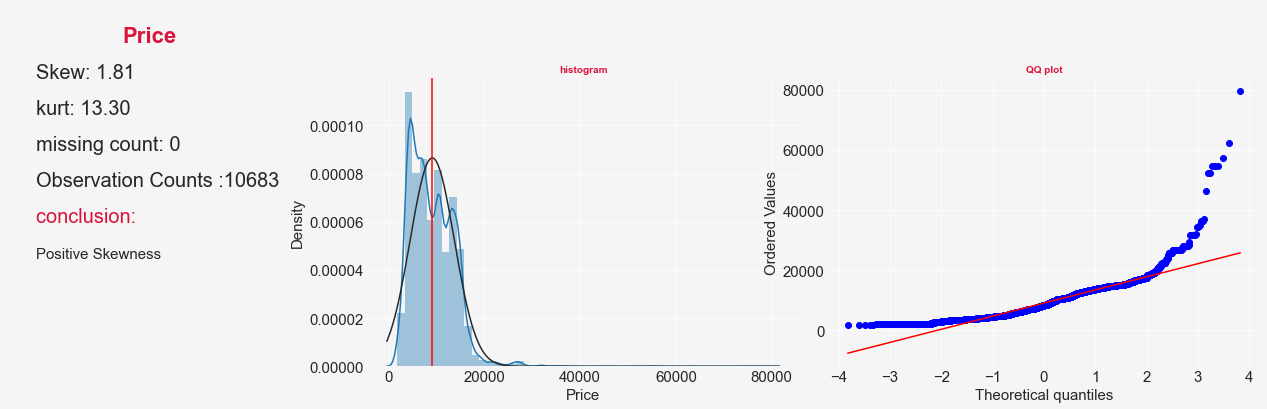

In [10]:
#plot 1
Numerical_Feat_Analysis(df)

- Right Skewness observed is 1.81,A normal distribution skewness ranges from -0.5 to 0.5.
- To Transform data into normal skewness range an transformation is required such as Log Transformation. 
- An excess Kurtosis value as Kurt-3 =13.30-3 =10.30 is detected .
- Outlier removal and transformation required to make data distubution normal.

#### Anomoly Detection and Treatment

 ##### Data Validity Check
- Delhi airport is listed as Delhi and New Delhi with Airport Code DEL that needs to be corrected in data

In [11]:
df.Source[df.Source=='Delhi']='New_Delhi'
df.Destination[df.Destination=='Delhi']='New_Delhi'
df.Source[df.Source=='New Delhi']='New_Delhi'
df.Destination[df.Destination=='New Delhi']='New_Delhi'
df.Airline[df.Airline=='Vistara Premium economy']='Vistara'
df.Additional_Info[df.Additional_Info=='No Info']='No info'

In [12]:
# Test data
test_df.Source[test_df.Source=='Delhi']='New_Delhi'
test_df.Destination[test_df.Destination=='Delhi']='New_Delhi'
test_df.Source[test_df.Source=='New Delhi']='New_Delhi'
test_df.Destination[test_df.Destination=='New Delhi']='New_Delhi'
test_df.Airline[test_df.Airline=='Vistara Premium economy']='Vistara'
test_df.Additional_Info[test_df.Additional_Info=='No Info']='No info'

In [13]:
#Finding the duplicates from dataset...
print(df.duplicated().sum())
#Dropping the duplicates.... 
df.drop_duplicates(inplace=True)

220


In [14]:
#Finding the duplicates from dataset...
print(test_df.duplicated().sum())
#Dropping the duplicates.... 
test_df.drop_duplicates(inplace=True)

27


##### Null Check

In [15]:
# Missing value check
pd.DataFrame(df.isnull().sum(),columns=['Missing values'])

,Missing values
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [16]:
# Missing value treatment
df=df.dropna()
test_df=test_df.dropna()

##### Outliers Check

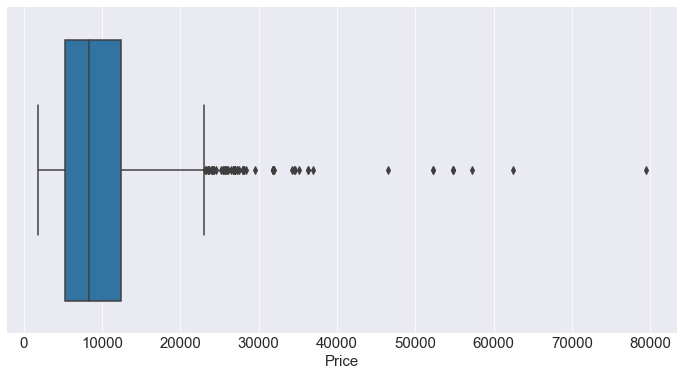

In [17]:
# Checking Outliers with the help of a box plot
plt.figure(figsize=(12,6))
sns.boxplot(df.Price)
plt.show()
#plot 2

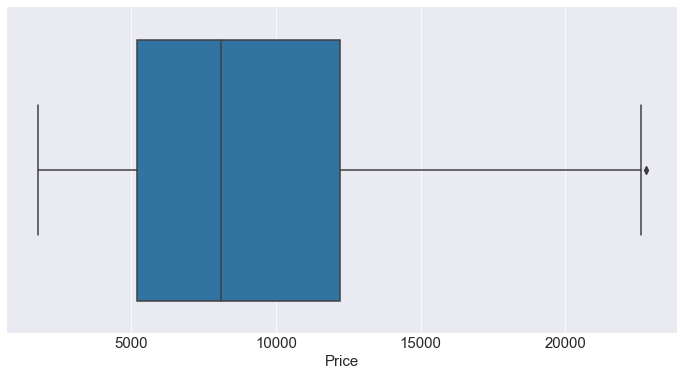

In [18]:
#Outlier detection and removal using zscore
z = np.abs(zscore(df.Price))
df['zscore']=z.tolist()
df=df[df.zscore<3]
df.drop(columns=['zscore'],inplace=True)
# Now checking the price for outliers
plt.figure(figsize=(12,6))
sns.boxplot(df.Price)
plt.show()
# plot 3

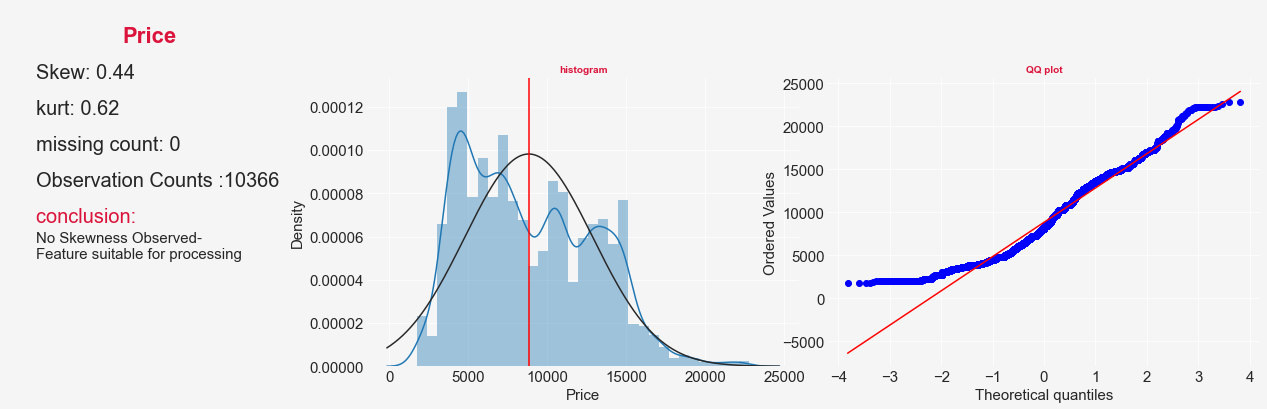

In [19]:
Numerical_Feat_Analysis(df)
#plot 4

- Outliers removal greatly effective on Kurt and skewness .
- Skewness 0.44 is in acceptable range and data is now normally distributed.
- After outliers removal Observation counts has decreased from 10683 to 10366.hence 317 outliers are removed.

In [20]:
# primary analysis of data
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New_Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,New_Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New_Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10366 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10366 non-null  object
 1   Date_of_Journey  10366 non-null  object
 2   Source           10366 non-null  object
 3   Destination      10366 non-null  object
 4   Route            10366 non-null  object
 5   Dep_Time         10366 non-null  object
 6   Arrival_Time     10366 non-null  object
 7   Duration         10366 non-null  object
 8   Total_Stops      10366 non-null  object
 9   Additional_Info  10366 non-null  object
 10  Price            10366 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 971.8+ KB


In [22]:
# Finding Null values in dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### <center>Feature Engineering</center>

**Analysis Plan**
- Finding **Distance** of source to destination in km.
    - Finding longest route for deciding maximum stops possible in data.
    - Splitting all the routes as a new dataframe features.
    - Getting co-oridnates of each airport from 'airport-in-india.csv' file.
    - Getting Total Distance of trip by using 'geopy.distance' library in python.
- Extracting **Journey_weekday,Journey_Month,Journey_Day** 'from Date_of_journey' Feature .
- Finding **Flight_Type** as 'connecting' or 'direct' based on number of stops the flight has. 
- Finding **Flight_Duration** in minutes based on departure and arrival time.
- Finding **Flight_at** as the flight is in morning,afternoon,evening or night.


**Distance**

In [23]:
# Finding the largest possible route in data
y='x'
for i in  list(df.Route.values):
    x=len(str(i))
    if x > len(y):
        y=i
print(y)

# There are a flight having six route

BLR → CCU → BBI → HYD → VGA → DEL


* BLR - DEL is one of the largest route flight having total 6 stops.
* We need to create a 6 route dataframe.

In [24]:
# finding and seprating all the routes of a flight .

def create_routes(data):
    
    data['Route1']=data['Route'].str.split('→').str[0]
    data['Route2']=data['Route'].str.split('→').str[1]
    data['Route3']=data['Route'].str.split('→').str[2]
    data['Route4']=data['Route'].str.split('→').str[3]
    data['Route5']=data['Route'].str.split('→').str[4]
    data['Route6']=data['Route'].str.split('→').str[5]

    data['Route1']=data.Route1.apply(lambda x:str(x).strip())
    data['Route2']=data.Route2.apply(lambda x:str(x).strip())
    data['Route3']=data.Route3.apply(lambda x:str(x).strip())
    data['Route4']=data.Route4.apply(lambda x:str(x).strip())
    data['Route5']=data.Route5.apply(lambda x:str(x).strip())
    data['Route6']=data.Route6.apply(lambda x:str(x).strip())

    return(data)


In [25]:
df=create_routes(df)

In [26]:
test=test_df.copy() # Copy of original Cleaned data without Feature Engineering
test_df=create_routes(test_df)

In [27]:
# Finding total distance of trip from airport location
# Importing the airport library for co-ordinates
coord_data=pd.read_csv("airports-in-india.csv") # Data taken from Data.world -(https://data.world/ourairports/5645d365-f8ec-434b-99ad-fc738d40b0de)
coord_data.head(1)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,26555,VIDP,large_airport,Indira Gandhi International Airport,28.5665,77.103104,777.0,AS,IN,IN-DL,New Delhi,1,VIDP,DEL,NaN,http://www.newdelhiairport.in/,http://en.wikipedia.org/wiki/Indira_Gandhi_Int...,Palam Air Force Station,51475,2017-12-15T03:08:58+00:00


In [28]:
# Indian Airport Iata code and Geo-Coordinates 
coordinates=coord_data[['latitude_deg','longitude_deg','iata_code']]
coordinates['location'] = list(zip(coordinates['latitude_deg'], coordinates['longitude_deg']))
coordinates=coordinates[['iata_code','location']].dropna()

In [29]:
# joining all the Coordinates with the Route Airports

def create_coordinates(data,coordinates_df):
    # For Boarding Airport
    data=data.merge(coordinates_df,left_on='Route1',right_on='iata_code',how='left') # merging route with coordinates
    data.rename(columns={'location':'location1'},inplace=True) # Replacing Location feature to location 1 indicates coordinates of route 1

    # Second Airport/Destination Airport
    data=data.merge(coordinates_df,left_on='Route2',right_on='iata_code',how='left')
    data.rename(columns={'location':'location2'},inplace=True)

    # Third Airport/Destination Airport
    data=data.merge(coordinates_df,left_on='Route3',right_on='iata_code',how='left')
    data.rename(columns={'location':'location3'},inplace=True)

    # Fourth Airport/Destination Airport
    data=data.merge(coordinates_df,left_on='Route4',right_on='iata_code',how='left')
    data.rename(columns={'location':'location4'},inplace=True)

    # Fifth Airport/Destination Airport
    data=data.merge(coordinates_df,left_on='Route5',right_on='iata_code',how='left')
    data.rename(columns={'location':'location5'},inplace=True)

    # Sixth Airport/Destination Airport
    data=data.merge(coordinates_df,left_on='Route6',right_on='iata_code',how='left')
    data.rename(columns={'location':'location6'},inplace=True)

    # Dropping Unneccessary columns
    data=data.drop(columns=['iata_code_x','iata_code_y']) # Droping extra columns created by merging 
    
    return(data)

In [30]:
df=create_coordinates(df,coordinates)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,Route6,location1,location2,location3,location4,location5,location6
0,IndiGo,24/03/2019,Banglore,New_Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR,DEL,nan,nan,nan,nan,"(13.1979, 77.706299)","(28.5665, 77.103104)",NaN,NaN,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU,IXR,BBI,BLR,nan,nan,"(22.65469933, 88.44670105)","(23.31430054, 85.32170105)","(20.24440002, 85.81780243)","(13.1979, 77.706299)",NaN,NaN


In [31]:
# Coordinates for test data
test_df=create_coordinates(test_df,coordinates)
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,Route6,location1,location2,location3,location4,location5,location6
0,Jet Airways,6/06/2019,New_Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,DEL,BOM,COK,nan,nan,nan,"(28.5665, 77.103104)","(19.08869934, 72.86789703)","(10.152, 76.401901)",NaN,NaN,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,CCU,MAA,BLR,nan,nan,nan,"(22.65469933, 88.44670105)","(12.99000549, 80.16929626)","(13.1979, 77.706299)",NaN,NaN,NaN


In [32]:
# Finding distance of full Travel Path
def route_distance(data):
    distance=[]
    
    for i in list(range(len(data))) :
        distance1=0
        distance2=0
        distance3=0
        distance4=0
        distance5=0
        cor1=data['location1'][i]
        cor2=data['location2'][i]
        cor3=data['location3'][i]
        cor4=data['location4'][i]
        cor5=data['location5'][i]
        cor6=data['location6'][i]

        if data['location2'][i] is not np.NaN:
            distance1=geopy.distance.GreatCircleDistance(cor1,cor2).km

        if data['location3'][i] is not np.NaN:
            distance2=geopy.distance.GreatCircleDistance(cor2, cor3).km

        if data['location4'][i] is not np.NaN:
            distance3=geopy.distance.GreatCircleDistance(cor3, cor4).km

        if data['location5'][i] is not np.NaN:
            distance4=geopy.distance.GreatCircleDistance(cor4, cor5).km

        if data['location6'][i] is not np.NaN:
            distance5=geopy.distance.GreatCircleDistance(cor5, cor6).km


        distance_total=distance1+distance2+distance3+distance4+distance5
        distance.append(distance_total)
        
    return(distance)

In [33]:
# Creating a Feature called distance for train data
df['Distance']=route_distance(df)

In [34]:
# Creating a Feature called distance for test data
test_df['Distance']=route_distance(test_df)

**Journey_weekday,Journey_Month,Journey_Day**

In [35]:
# Extracting day,month and weekday
def extract_datetime_features(df):
    df['Journey_day']=pd.to_datetime(df.Date_of_Journey).dt.day
    df['Journey_month']=pd.to_datetime(df.Date_of_Journey).dt.month
    df['Journey_Weekday']=pd.to_datetime(df.Date_of_Journey).dt.weekday
    
    return (df)

In [36]:
# Extracting day,month and weekday : Train Data
df=extract_datetime_features(df)

In [37]:
# Extracting day,month and weekday : Train Data
test_df=extract_datetime_features(test_df)

**Flight_Type**

In [38]:
# Creating Usable value from data
df.Total_Stops[df['Total_Stops']=='non-stop']='0 stops'

# test data
test_df.Total_Stops[test_df['Total_Stops']=='non-stop']='0 stops'

# Extracting type of flight
def flight_type(x):
    stops=int(re.findall('\d',x)[0])
    if stops>0:
        return('Connecting_Flight')
    else:
        return('Direct_Flight')
    
df['Flight_type']=df['Total_Stops'].apply(flight_type)
# test data
test_df['Flight_type']=test_df['Total_Stops'].apply(flight_type)

**Stops**

In [39]:
# Extracting no of stops:
def flight_stops(x):
    stop=int(re.findall('\d',x)[0])
    return(stop)

# Creating Number of stops feature
df['No_of_stops']=df['Total_Stops'].apply(flight_stops)
# test data
test_df['No_of_stops']=test_df['Total_Stops'].apply(flight_stops)

**Flight_Duration**

In [40]:
# Duaration to minutes
def flight_duration(x):
    time=re.findall('\d+',x)
    if len(time)==1:
        time.append('0')
    hours=int(time[0])
    minutes=int(time[1])
    total_duration=(hours*60)+minutes
    return(total_duration)

# Creating Flight duration Feature
df['Flight_duration']=df.Duration.apply(flight_duration)
#test data
test_df['Flight_duration']=test_df.Duration.apply(flight_duration)

**Flight_at**

In [41]:
# Defining morning evening afternoon and night
df['Dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
# test data
test_df['Dep_hour']=pd.to_datetime(test_df.Dep_Time).dt.hour

def flight_time(x):
    if x >=5 and x < 12 :
        return ('morning')
    elif x>=12 and x < 17 :
        return ('afternoon')
    elif x>=17 and x < 20 :
        return('evening')
    else :
        return ('night')


df['flight_at']=df.Dep_hour.apply(flight_time)
# test data
test_df['flight_at']=test_df.Dep_hour.apply(flight_time)
    

In [42]:
# Dropping the unwanted features
df=df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Dep_hour',\
                        'Route1','Route2','Route3','Route4','Route5','Route6','location1','location2','location3','location4','location5','location6'])
# test data
test_df=test_df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Dep_hour',\
                       'Route1','Route2','Route3','Route4','Route5','Route6','location1','location2','location3','location4','location5','location6'])

In [43]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Distance,Journey_day,Journey_month,Journey_Weekday,Flight_type,No_of_stops,Flight_duration,flight_at
0,IndiGo,Banglore,New_Delhi,No info,3897,1710.051469,24,3,6,Direct_Flight,0,170,night
1,Air India,Kolkata,Banglore,No info,7662,1839.051344,5,1,5,Connecting_Flight,2,445,morning
2,Jet Airways,New_Delhi,Cochin,No info,13882,2670.874218,6,9,4,Connecting_Flight,2,1140,morning
3,IndiGo,Kolkata,Banglore,No info,6218,1874.451294,5,12,3,Connecting_Flight,1,325,evening
4,IndiGo,Banglore,New_Delhi,No info,13302,1743.166691,3,1,3,Connecting_Flight,1,285,afternoon


In [44]:
test_df.head()

,Airline,Source,Destination,Additional_Info,Distance,Journey_day,Journey_month,Journey_Weekday,Flight_type,No_of_stops,Flight_duration,flight_at
0,Jet Airways,New_Delhi,Cochin,No info,2202.045386,6,6,3,Connecting_Flight,1,655,evening
1,IndiGo,Kolkata,Banglore,No info,1653.458299,5,12,3,Connecting_Flight,1,240,morning
2,Jet Airways,New_Delhi,Cochin,In-flight meal not included,2202.045386,21,5,1,Connecting_Flight,1,1425,evening
3,Multiple carriers,New_Delhi,Cochin,No info,2202.045386,21,5,1,Connecting_Flight,1,780,morning
4,Air Asia,Banglore,New_Delhi,No info,1710.051469,24,6,0,Direct_Flight,0,170,night


### <center>EDA And Visulization</center>

**EDA Plan**
* For EDA I divded the data according to the flight routes.(Created Groups according to flight route)
* For each flight route , to find insight I create function that take route as parameter.
* At last to find insights Based on whole data.

In [45]:
# Creating a function of grouping the source and destination.
def groups_of_flight(source,destination):
    group=df[(df.Source==source)&(df.Destination==destination) ]
    return (group)

In [46]:
# Finding avaialble flight groups dataset
groups=[] # To store the grouped dataframe names
number_of_flights=[] # To store the count of Flights for a specific route/group
for x in df.Source.unique(): #unique source airports
    for y in df.Destination.unique(): # unique destination airport
        globals()[x+'_to_'+y]=groups_of_flight(x,y) # Global create variable of string
        if len(globals()[x+'_to_'+y]) >0:   #taking in consideration only the Available flight routes
            groups.append(x+'_to_'+y)
            number_of_flights.append(len(globals()[x+'_to_'+y]))
        
available_flights=pd.DataFrame({'Flight Path_DataFrames':groups,'Number of flights':number_of_flights})
available_flights.append(available_flights[['Number of flights']].sum().rename('Total Flights')) # verifing total records

,Flight Path_DataFrames,Number of flights
0,Banglore_to_New_Delhi,2106.0
1,Kolkata_to_Banglore,2859.0
2,New_Delhi_to_Cochin,4329.0
3,Chennai_to_Kolkata,381.0
4,Mumbai_to_Hyderabad,691.0
Total Flights,NaN,10366.0


In [47]:
# Example of one Route dataframe
Banglore_to_New_Delhi.head()

,Airline,Source,Destination,Additional_Info,Price,Distance,Journey_day,Journey_month,Journey_Weekday,Flight_type,No_of_stops,Flight_duration,flight_at
0,IndiGo,Banglore,New_Delhi,No info,3897,1710.051469,24,3,6,Direct_Flight,0,170,night
4,IndiGo,Banglore,New_Delhi,No info,13302,1743.166691,3,1,3,Connecting_Flight,1,285,afternoon
6,Jet Airways,Banglore,New_Delhi,In-flight meal not included,11087,1972.395564,3,12,1,Connecting_Flight,1,930,evening
7,Jet Airways,Banglore,New_Delhi,No info,22270,1972.395564,3,1,3,Connecting_Flight,1,1265,morning
8,Jet Airways,Banglore,New_Delhi,In-flight meal not included,11087,1972.395564,3,12,1,Connecting_Flight,1,1530,morning


**Plot Functions**

In [48]:
class Annotations:        
    def bar_annotation(self,plot, feature, Number_of_categories, hue_categories):
            bar_height = [p.get_height() for p in plot.patches]
            patch = [p for p in plot.patches]
            for i in range(Number_of_categories):
                number_of_features= list(Counter(feature).values())[i]
                for j in range(hue_categories):
                    flight_count = '{:.0f}'.format((bar_height[(j*Number_of_categories + i)]))
                    x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2-0.1
                    y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
                    plot.annotate(flight_count, (x, y), size = 12)
            plt.show()
            return()

In [49]:
class plots(Annotations):
    
    def __init__(self):
        self.Route_codes={0:'Banglore_to_New_Delhi',1:'Kolkata_to_Banglore',2:'New_Delhi_to_Cochin',3:'Chennai_to_Kolkata',4:'Mumbai_to_Hyderabad'}
        print("Available Flight route Codes :-\n\n\tBanglore_to_New_Delhi: 0\n\tKolkata_to_Banglore  : 1\n\tNew_Delhi_to_Cochin  : 2\n\tChennai_to_Kolkata   : 3\n\tMumbai_to_Hyderabad  : 4\n\tOverall Data         : 'dataset_name'")
        print("\nFlight Types:-\n(for 'Average_Flight_price' only)\n\t'Connecting_Flight'\n\t'Direct_Flight'")

        
    # PLot 1 counting total flights of each airline on the route

    def Flight_count(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,6))
        ax=sns.countplot(dataframe.Airline,hue=dataframe.Flight_type)
        plt.title('Count of '+Route+' Flights')
        plt.xticks(rotation=90)
        
        Annotations().bar_annotation(ax,dataframe.Airline,len(dataframe.Airline.unique()),len(dataframe.Flight_type.unique()))
        plt.show()
        return
        
        
        
    # Plot 2 Average Flight ticket Pricing of each Airlines on this route
        
    def Average_Flight_price(self,Route_dataframe_code,type_of_flight):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,6))
        ax=sns.barplot(x=dataframe.Airline,y=dataframe.Price[dataframe.Flight_type==type_of_flight],ci=None)
        plt.title('Average Flight Price for '+Route+'('+type_of_flight+')')
        plt.xticks(rotation=90)
            
        Annotations().bar_annotation(ax,dataframe.Airline,len(dataframe.Airline.unique()),1)
        plt.show()
        return 
    

    # Plot 3 Average Flight price Range    
    
    def Flight_price_range(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(15,8))
        sns.boxplot(x='Airline',y='Price',hue='Flight_type',data=dataframe)
        plt.title(Route+" Flight Ticket Price Range", fontsize = 20)
        plt.show()
        return
        
        
    # Plot 4 Average Flight ticket Pricing  for every airline based on month

    def Lowest_price_month(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,12))
        sns.lineplot(x = "Journey_month", y = "Price", data =dataframe, hue = "Airline",
            style = "Airline", dashes = False,  legend="brief",ci=False,markers=True)
 
        plt.title(Route+" Monthly Avg. Ticket Price", fontsize = 20) # for title
        plt.xlabel("Month of Journey", fontsize = 15) # label for x-axis
        plt.ylabel("Ticket Price", fontsize = 15) # label for y-axis
        plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','april','may','jun','july','aug','sep','oct','nov','dec'])
        plt.show()
        return

    
    # Plot 5 Average Price on date of month

    def Lowest_price_date(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,12))
        sns.lineplot(x='Journey_day',y='Price',hue='Airline',data=dataframe,ci=False)
        plt.title(Route+" Daywise Avg. Ticket Price", fontsize = 20) # for title
        plt.xlabel("Day of Journey", fontsize = 15) # label for x-axis
        plt.ylabel("Ticket Price", fontsize = 15) # label for y-axis
        plt.show()
        return

    # Plot 6 Average price on Days of weeks
    
    def Lowest_price_weekday(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,12))
        sns.lineplot(x='Journey_Weekday',y='Price',hue='Airline',data=dataframe,ci=False)
        plt.title(Route+" Weekday Avg. Ticket Price", fontsize = 20) # for title
        plt.xlabel("Weekday of Journey", fontsize = 15) # label for x-axis
        plt.ylabel("Ticket Price", fontsize = 15) # label for y-axis
        plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
        plt.show()
        return
    
    # Plot 7 Average Price At Different Time of a day
    
    def Lowest_price_at(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,12))
        sns.boxplot(x='flight_at',y='Price',data=Banglore_to_New_Delhi)
        plt.title(Route+" Ticket Price variation In day", fontsize = 20)
        plt.show()
        return
    
        
    # Plot 8 Flight Duration on a specific route
    
    def Flight_duration_distribution(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,15))
        ax=sns.kdeplot(dataframe.Flight_duration,shade=True)
        plt.axvline(dataframe.Flight_duration.median())
        plt.title(Route+" Flight Duration Distribution (In Minutes)", fontsize = 20)
        plt.text(dataframe.Flight_duration.median()+500,0.0010,f'Median flight Duration is :{dataframe.Flight_duration.median()} Minutes',fontsize=20)
        plt.show()
        return
    
        
    # Plot 9 Additional Info effect on ticket pricing
    
    def Additional_info_effect(self,Route_dataframe_code):
        if type(Route_dataframe_code)==int:
            Route=self.Route_codes[Route_dataframe_code]
            dataframe=globals()[Route]
        else:
            Route='All Route'
            dataframe=Route_dataframe_code.copy()
        plt.figure(figsize=(20,8))
        sns.catplot(x='Additional_Info',y='Price',data=dataframe,kind='boxen',aspect=4)
        plt.title(Route+" -Additional Info Effect on Ticket Price", fontsize = 20)
        plt.show()
        return
        
    

In [50]:
# Creating Instance of the class:
graph=plots()

Available Flight route Codes :-

	Banglore_to_New_Delhi: 0
	Kolkata_to_Banglore  : 1
	New_Delhi_to_Cochin  : 2
	Chennai_to_Kolkata   : 3
	Mumbai_to_Hyderabad  : 4
	Overall Data         : 'dataset_name'

Flight Types:-
(for 'Average_Flight_price' only)
	'Connecting_Flight'
	'Direct_Flight'


**For Visulization purpose taken only one route for example and will use entire dataset afterwards**
* Taken Route:-  Banglore_to_New_Delhi - Route code 0

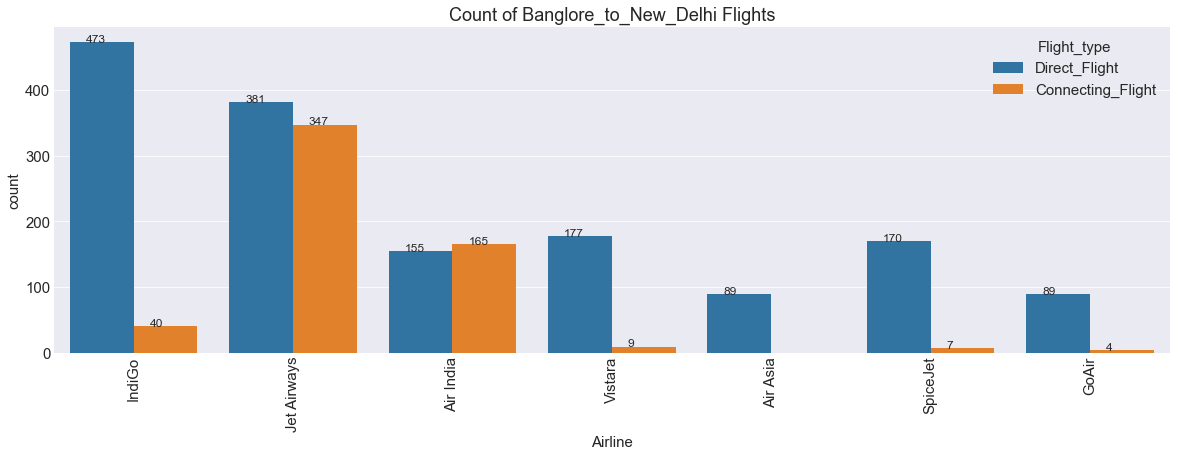

In [51]:
#Plot 5
graph.Flight_count(0)

**Takeaway Points**<br>
* 'Indigo','Vistara','Air Asia','Spice Jet','GoAir' are some airlines that offers direct flights from Banglore to New_Delhi.It can be possible that this will offer fastest way to travel comapre to connecting flight and has cheaper in prices.
* 'Indigo' has most number of flights for this route.Where as 'Air Asia' has minimum fights.
* 'Jet Airways' is one of the most premium and reliable service in this route. It offers both connecting as well as direct flights and has a frequent count of it.
* Hence for the route 'Banglore to New_Delhi' most of the chances are the flight available is grom 'Indigo' or 'Jet Airways' , as price of tickets is not a considerable factor.

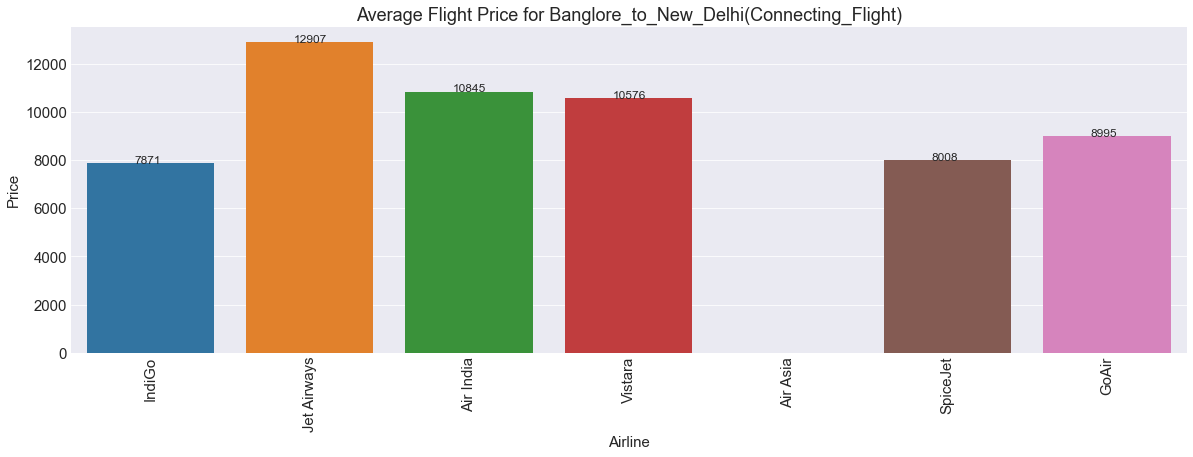

In [52]:
#Plot 6
graph.Average_Flight_price(0,'Connecting_Flight')

**Takeaway Points**<br>
* 'Jet Airways' airline tops the chart with around 12907 INR as average flight price for Banglore To New_Delhi flights.
* This analysis shows travling by 'Indigo' , 'SpiceJet','GoAir' has maximum possiblity for lowest flight ticket price.
* 'Vistara','Air India' offers nealy same pricing for this journey.

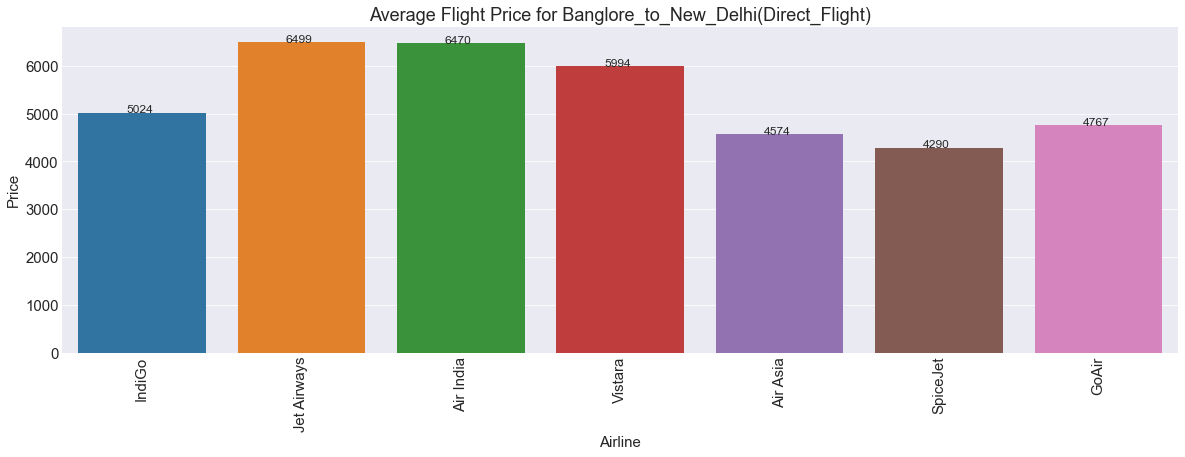

In [53]:
#Plot 7
graph.Average_Flight_price(0,'Direct_Flight')

**Takeaway Points**<br>
* Comapre to Connecting flights , direct flights are alaways cheaper.
* The average pricing for all the airlines has reduced to a greater margine comapre to connecting flights.
* Still the cheaper and expensive price segment airline category is not changed.
* 'Indigo','SpiceJet','GoAir' are having lowest average flight ticket pricing.
* 'Air Asia' only has direct flights and this analysis shows it also one of the cheapest option for this route flights.
* 'Jet Airways','Air India','Vistara' are expesnive flight ticket price for this route.

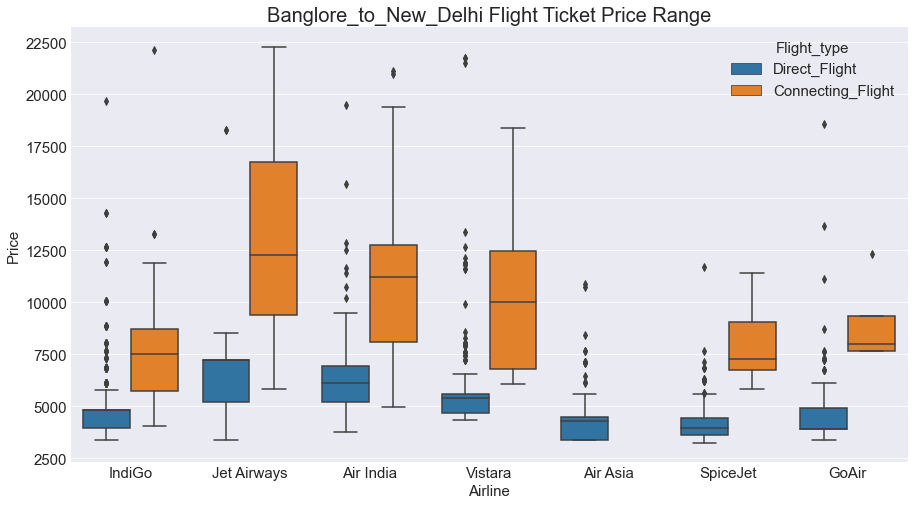

In [54]:
# Plot 8
graph.Flight_price_range(0)

**Takeaway Points**<br>
* Analysing the range for this route flight pricing has same effect like average pricing.
* 'Jet Airways' has the most expensive pricing range . But the direct flight ticket price range is very low compare to connecting flights. 
* All cases shows its most preferable to take an direct flight comapre to connecting flight for a cheap ticket pricing.

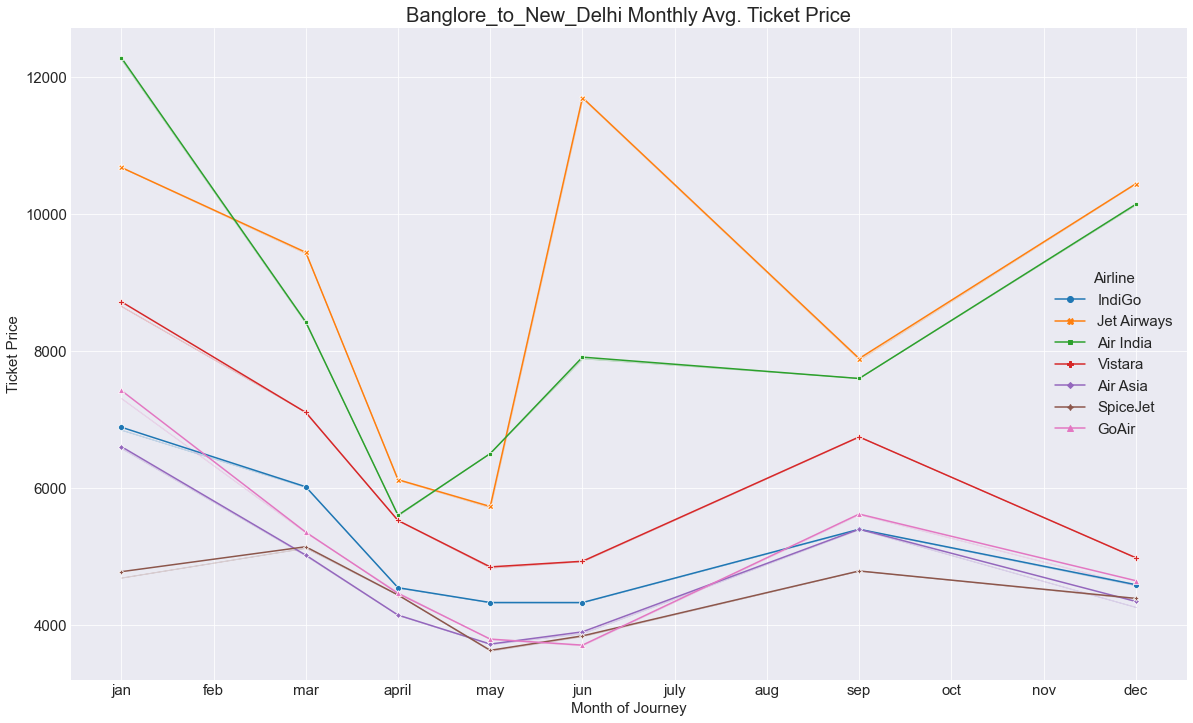

In [55]:
#Plot 9
graph.Lowest_price_month(0)

**Takeaway Points**<br>
* Monthly Average pricing of Flight tickets shows differce from each airline.
* 'SpiceJet','Indigo','GoAir' are having lowest average prices in the montly changelog.
* April, May , June are the months having lowest price fare in the year.
* 'Jet Airways' has alaways higher flight pricing than others.
* There is alaways a peek in pricing in the september month.

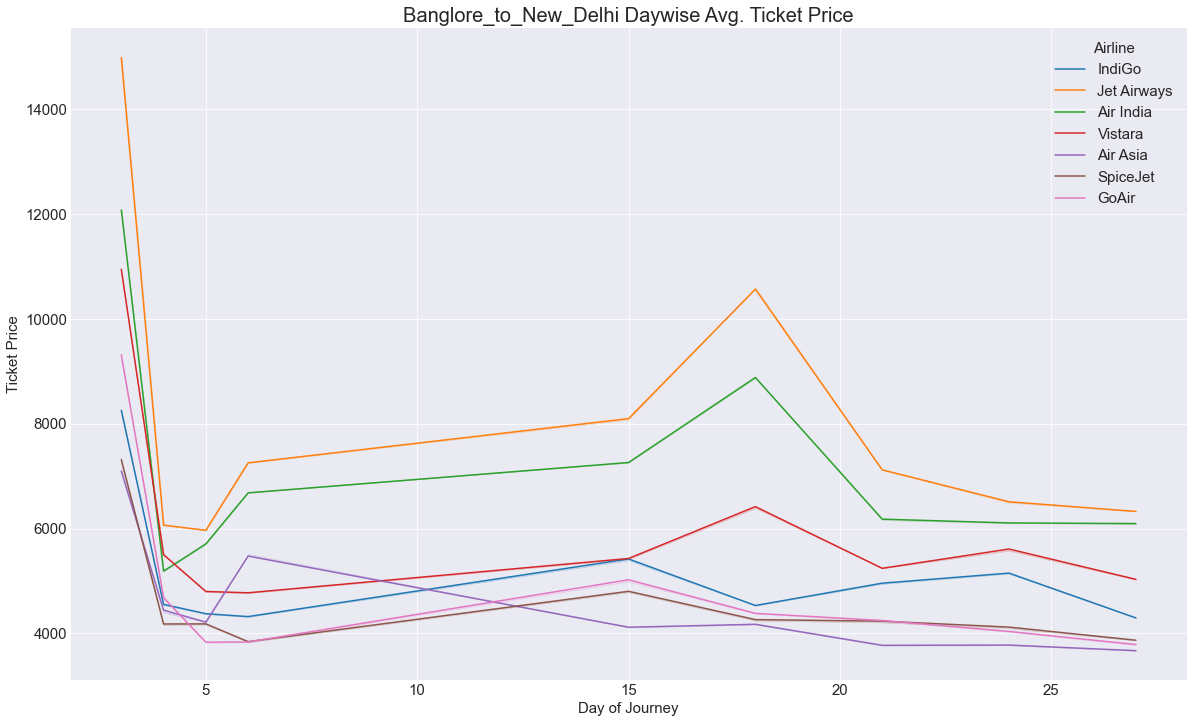

In [56]:
#plot 10
graph.Lowest_price_date(0)

**Takeaway Points**<br>
* In a month the first week of the month from date 1 to 5 shows much variance in fare.
* Date 15-20 are the days having expensive price on tickets.

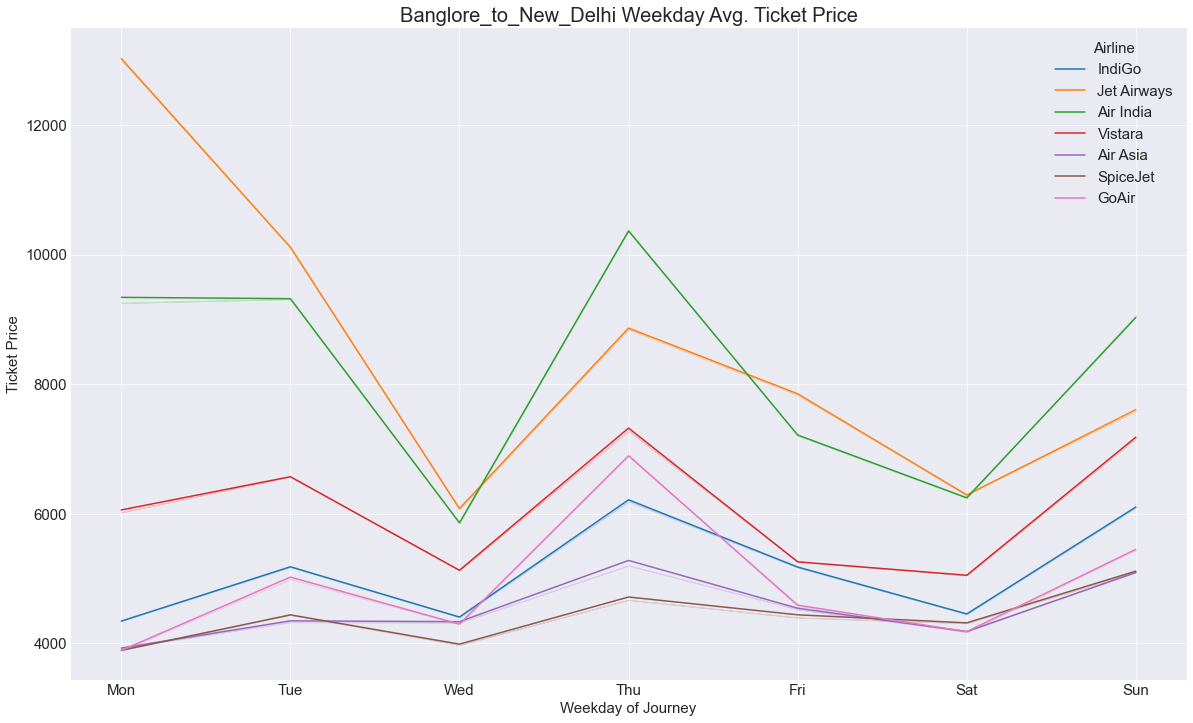

In [57]:
#plot 11
graph.Lowest_price_weekday(0)

**Takeaway Points**<br>
* On a weekly basis 'Wednesday' , 'Saturday' has lowest flight pricing.
* 'Thuresday' is the day having pricing more than average.

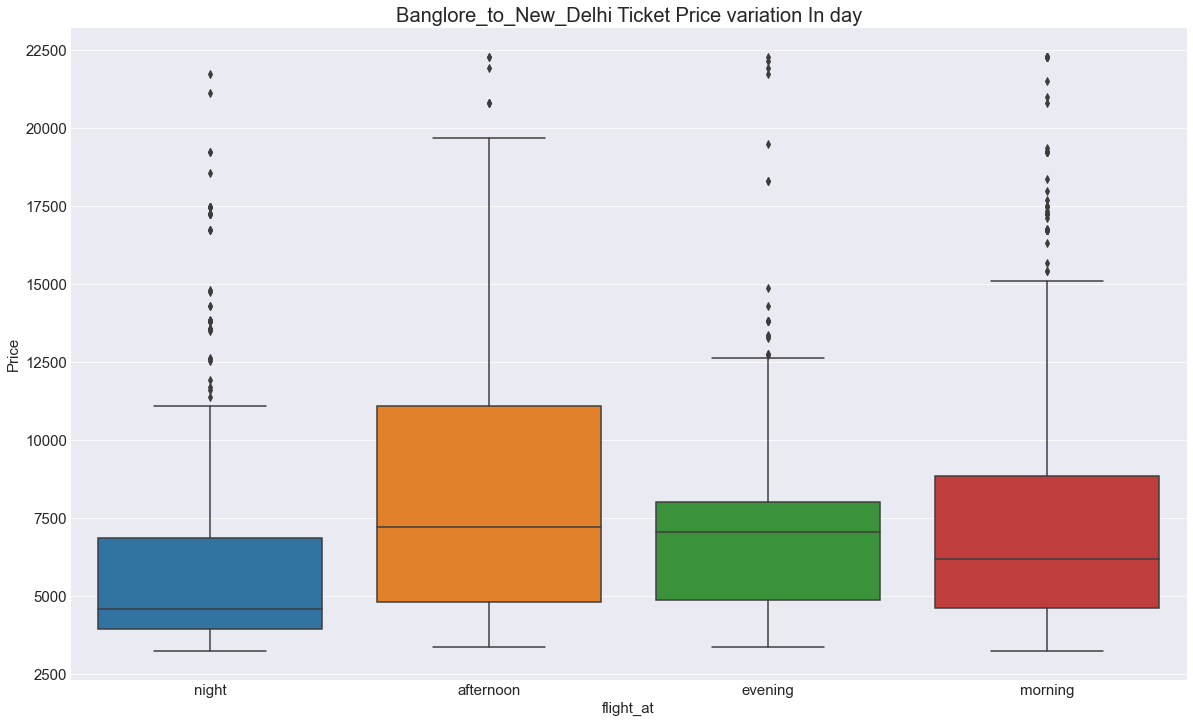

In [58]:
#plot 12
graph.Lowest_price_at(0)

**Takeaway Points**<br>
* In a day , Fights at mid-night and morning for the same route are much cheaper than other time.
* Flights at afternoon and evening are in expensive category and has wide range for pricing.

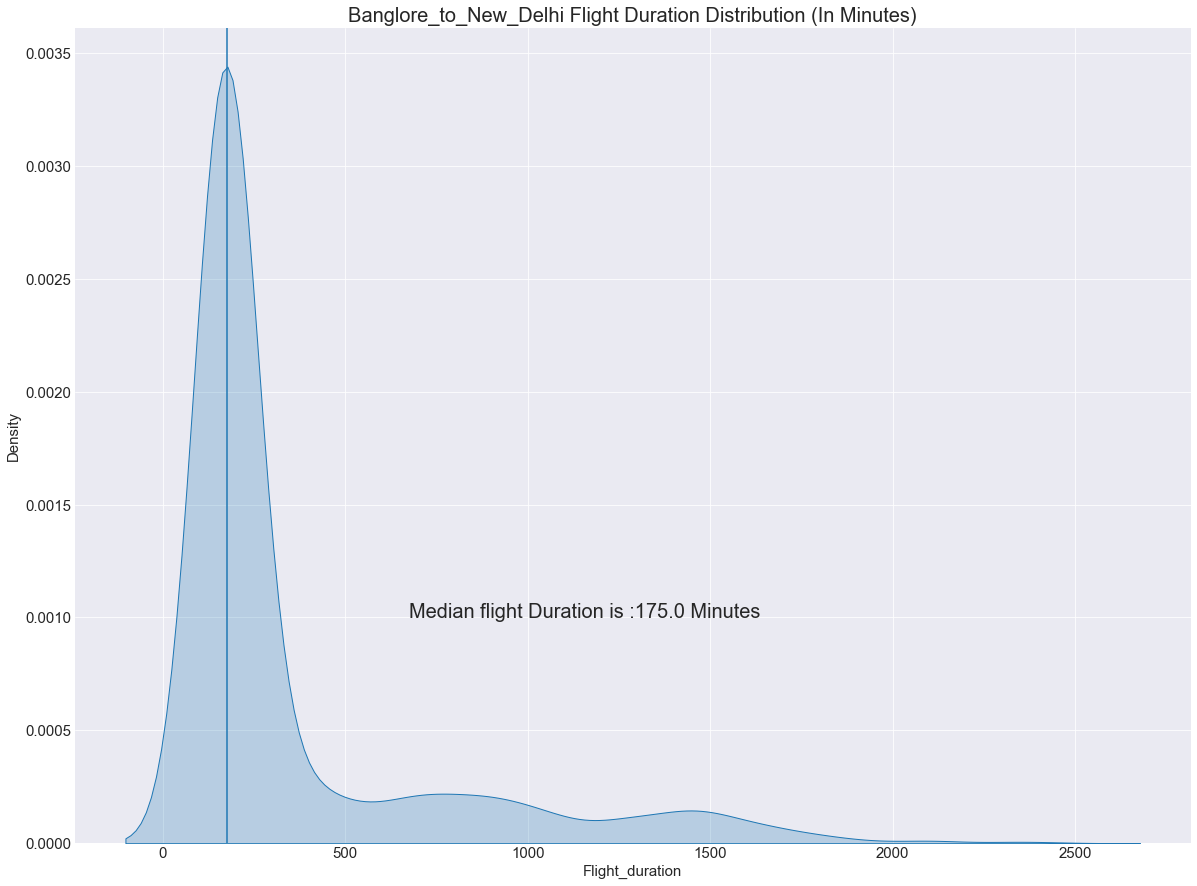

In [59]:
#Plot 13
graph.Flight_duration_distribution(0)

**Takeaway Points**<br>
* The normal flight duration for Banglore to New Delhi is 175 Minutes on average.
* There are flight that takes much more time than average can be due to connecting flights.

<Figure size 1440x576 with 0 Axes>

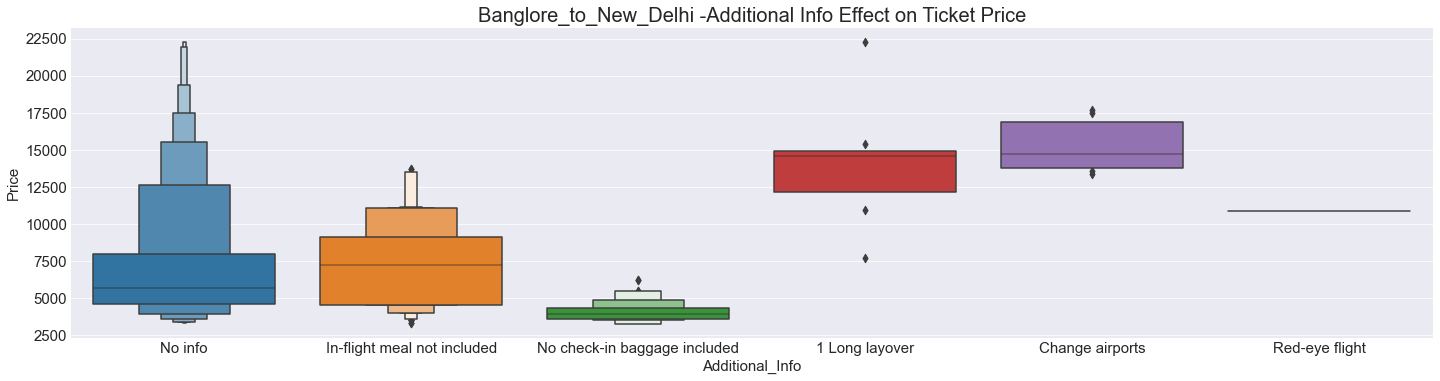

In [60]:
#Plot 14
graph.Additional_info_effect(0)

**Takeaway Points**<br>
* Additional info shows variation on ticket pricing.
* Where as most of the flights are in 'No info' category.
* 'No check-in baggage include' flights has lowest price than any other flight which is obevious.

**On Entire Dataset**

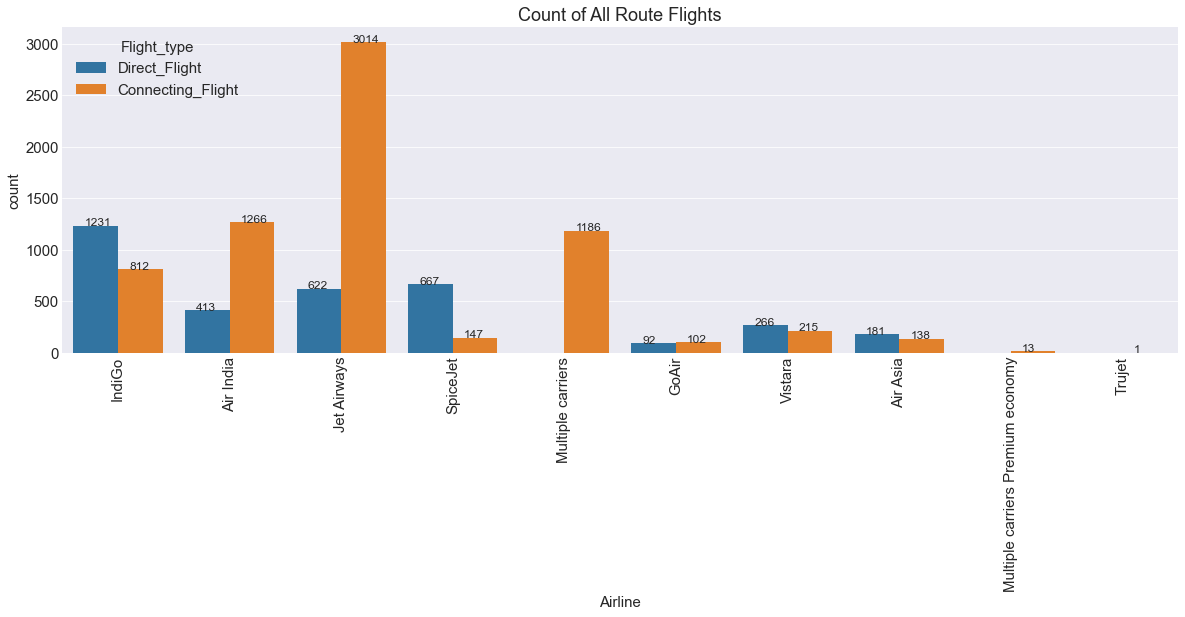

In [61]:
#Plot 15
graph.Flight_count(df)

**Takeaway Points**<br>
* Entire data shows 'Indigo','Air India','Jet Airways' are most freqent flights available.
* There is only one flight for 'Truejet' and very few flights for 'Multiple carriers Premium economy' airlines.
* This category can be eliminated as very few records further.
* 'Multiple carriers' has only connecting flights.

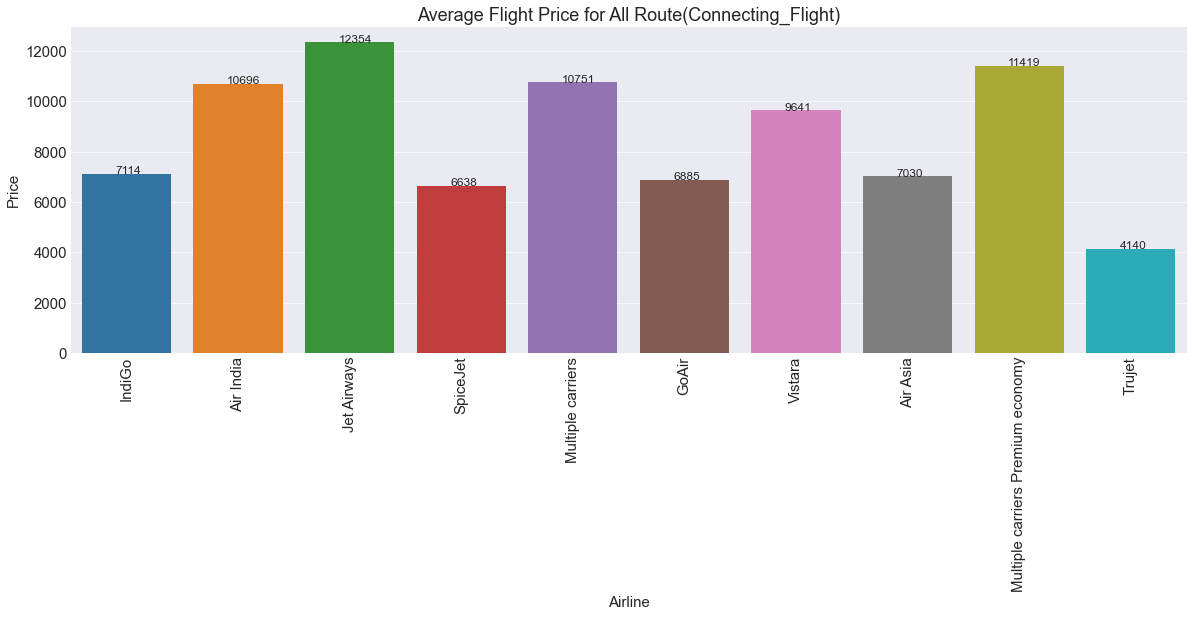

In [62]:
#Plot 16
graph.Average_Flight_price(df,'Connecting_Flight')

**Takeaway Points**<br>
* for 'connecting flight' category as for a single route there is also 'Jet Airways' has expensive average flight fare.
* 'Indigo','Spicejet','GoAir','Truejet' are the cheapest flight average pricing as seen by individual route.

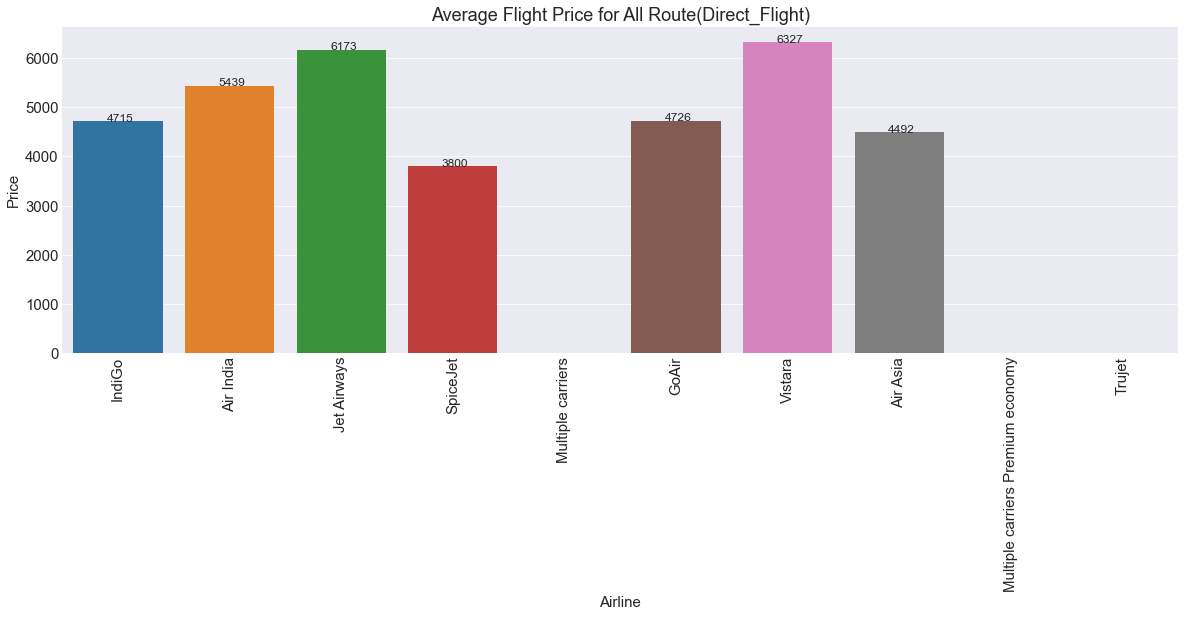

In [63]:
#Plot 17
graph.Average_Flight_price(df,'Direct_Flight')

**Takeaway Points**<br>
* 'Direct flight' alaways seen to be cheaper than 'connecting flights'.
* The price categories for direct flights are very low than connecting flights.
* Spice jet are the lowest average flight fare in this category.

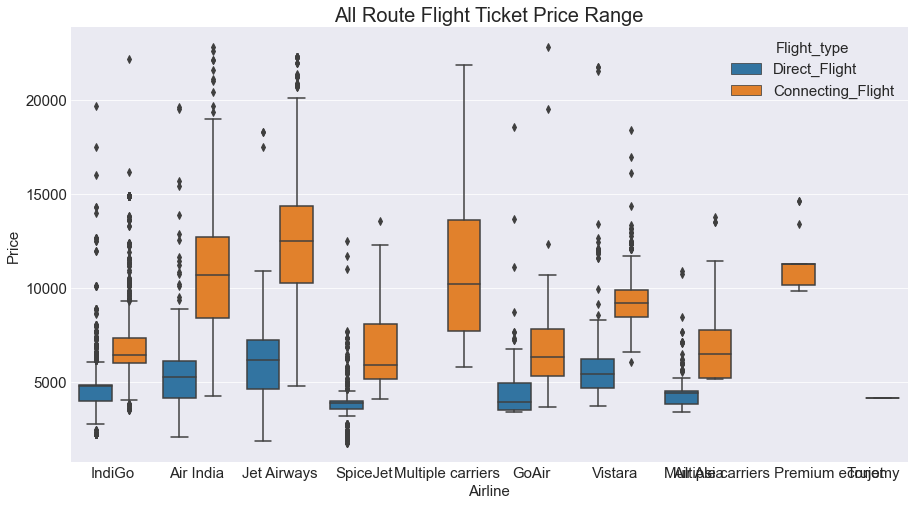

In [64]:
# Plot 18
graph.Flight_price_range(df)

**Takeaway Points**<br>
* Fare range is the best way to check airlines for desire price range group.
* 'Jet Airways' shows alaways having higher prices for both 'Direct' and 'Connecting' Flight.
* 'Indigo','Spice Jet' are the most cheapest flight price ranges as from plots.

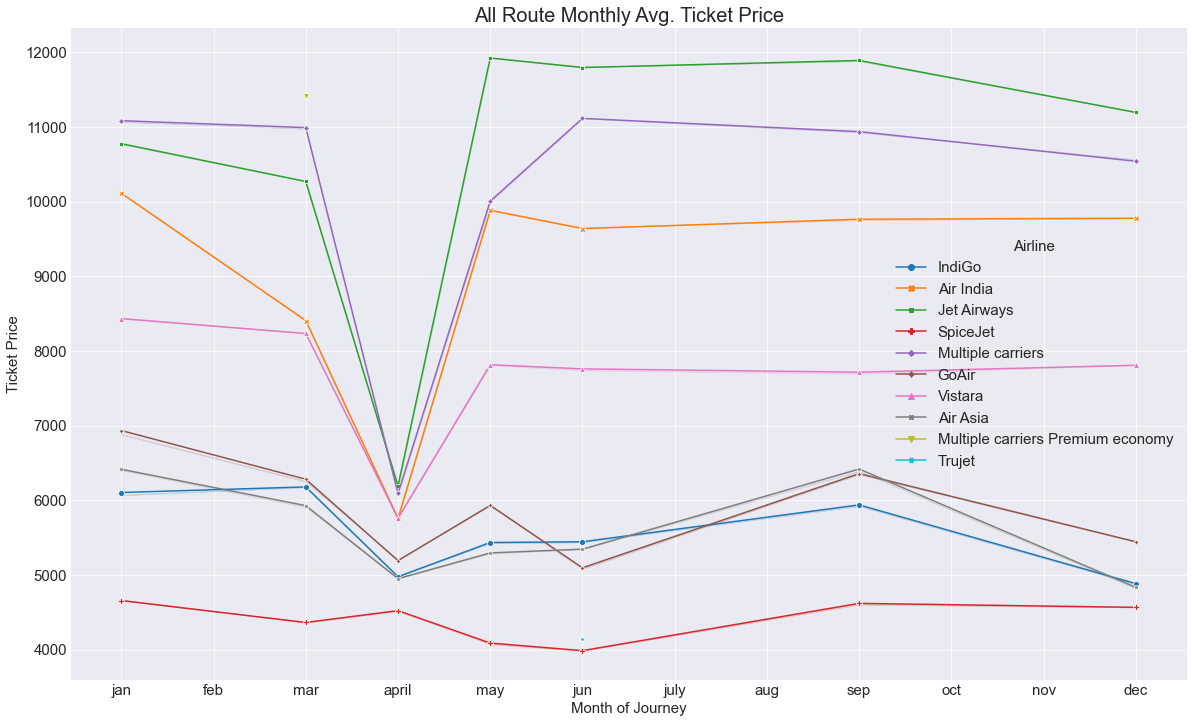

In [65]:
#Plot 19
graph.Lowest_price_month(df)

**Takeaway Points**<br>
* 'April' month shows lowest prices on flight tickets.
* There are very less fluctuation in fare for spicejet airline.
* 'Jet Airways' alaways shows high fare than any other flights.
* 'September' shows peek for all airlines for fare.

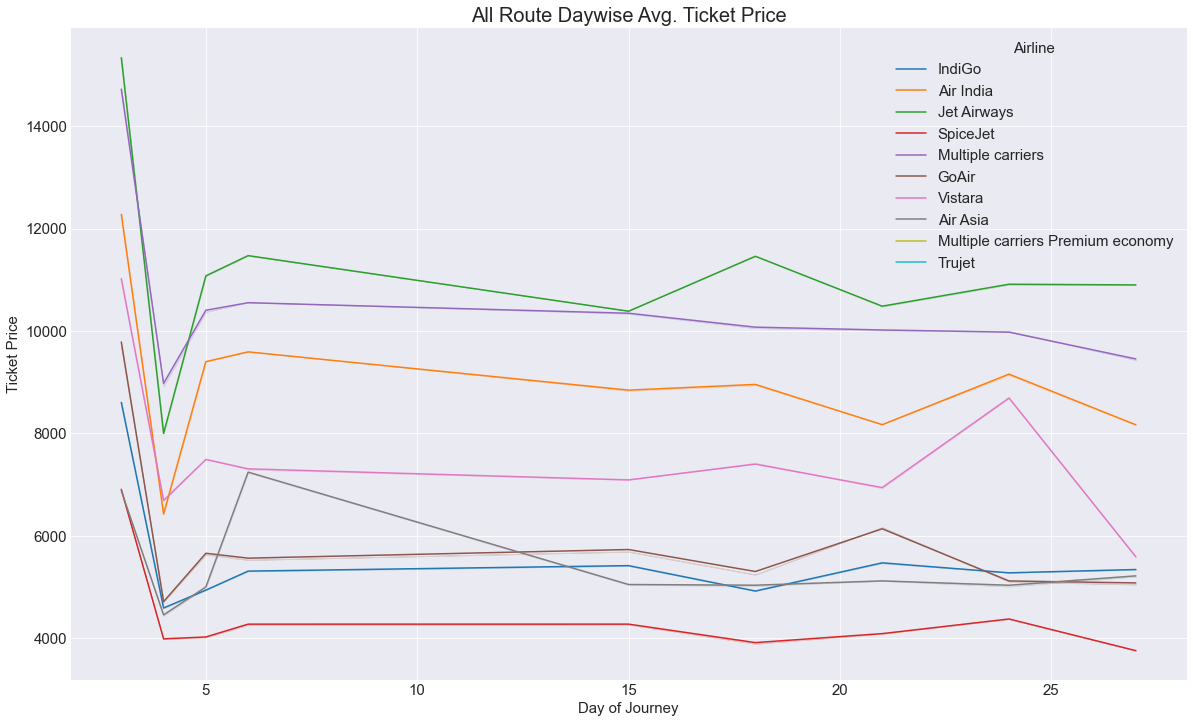

In [66]:
#plot 20
graph.Lowest_price_date(df)

**Takeaway Points**<br>
* In a month the first week of the month from date 1 to 5 shows much variance in fare.
* Date 15-20 are the days having expensive price on tickets.

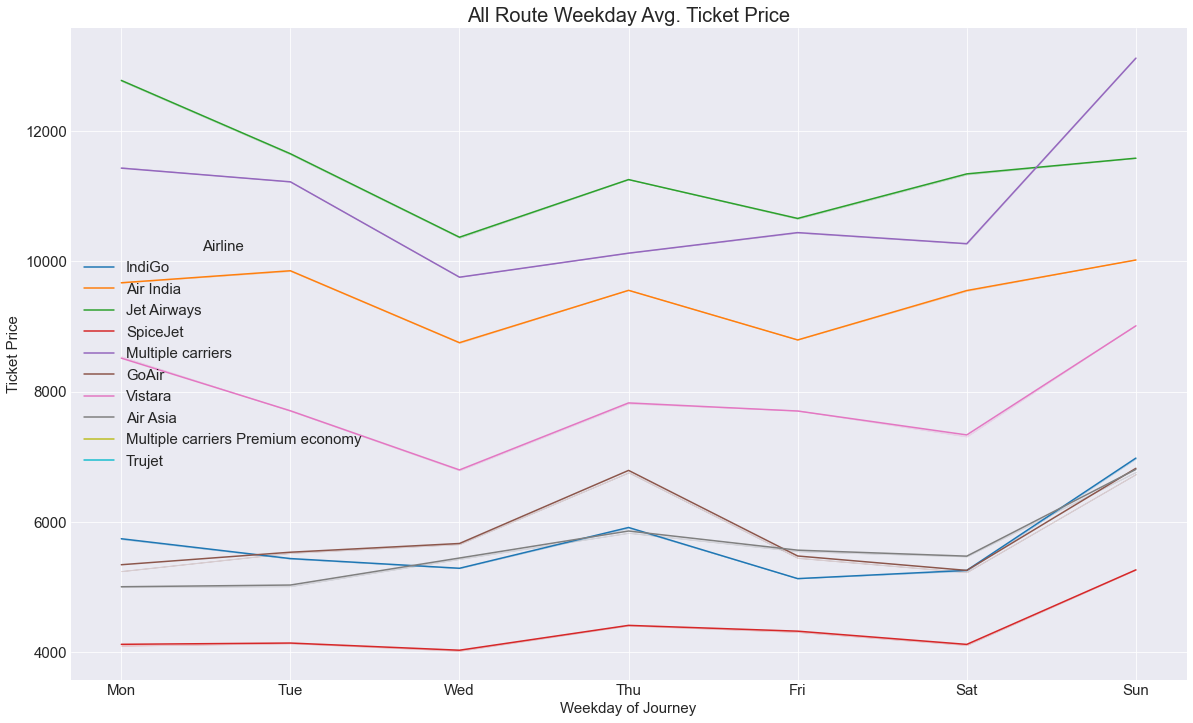

In [67]:
#plot 21
graph.Lowest_price_weekday(df)

**Takeaway Points**<br>
* On a weekly basis 'Wednesday' , 'Saturday' has lowest flight pricing.
* 'Thuresday' is the day having pricing more than average.

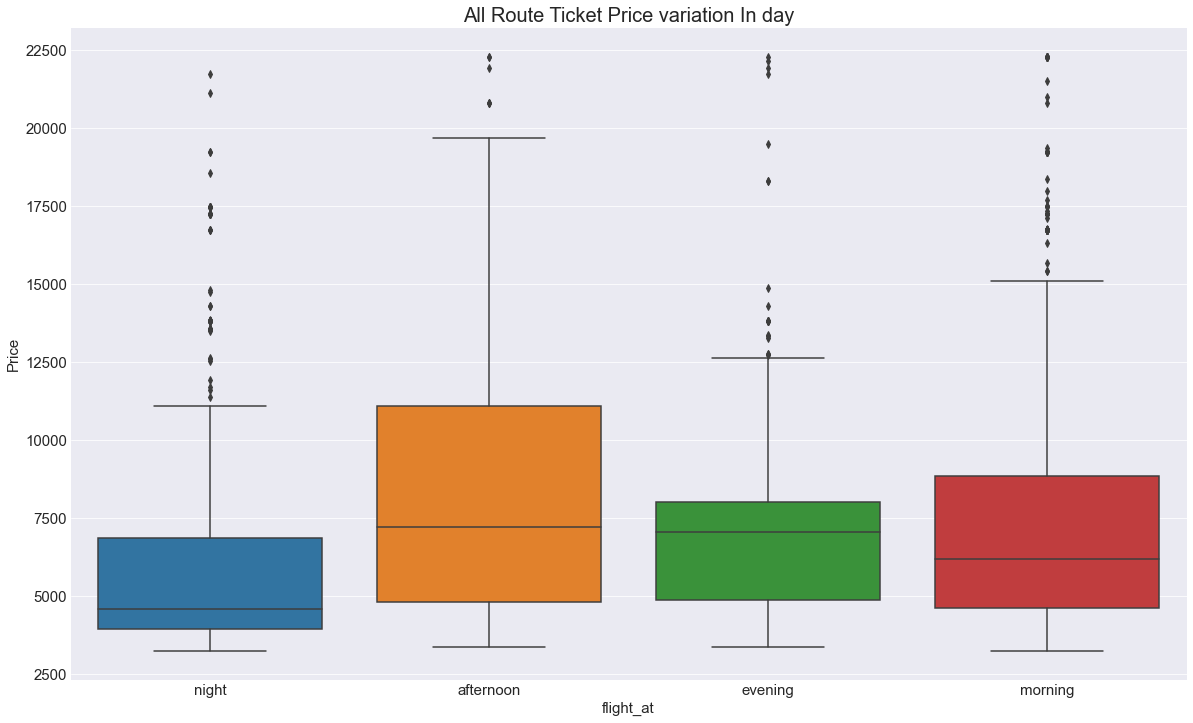

In [68]:
#plot 22
graph.Lowest_price_at(df)

**Takeaway Points**<br>
* In a day , Fights at mid-night and morning for the same route are much cheaper than other time.
* Flights at afternoon and evening are in expensive category and has wide range for pricing.

<Figure size 1440x576 with 0 Axes>

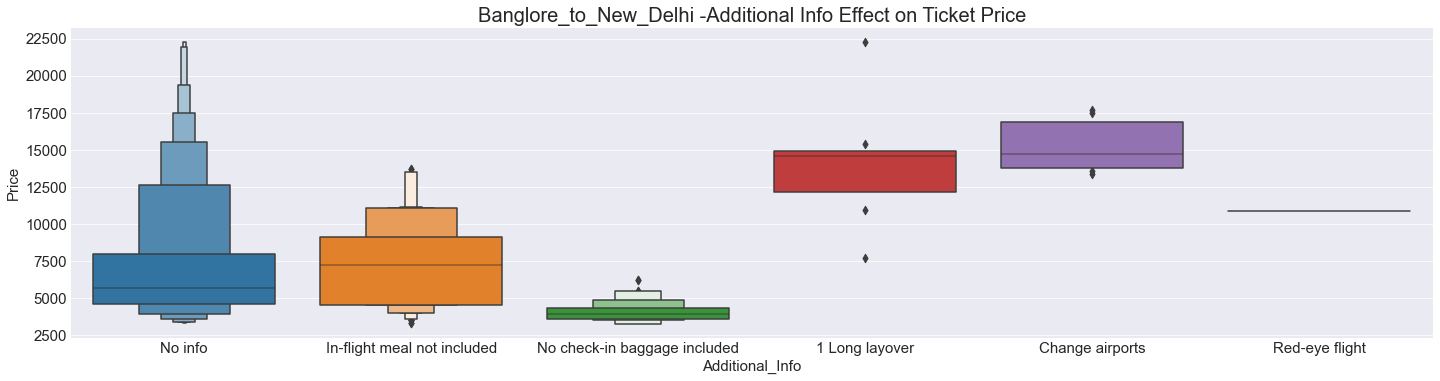

In [69]:
#Plot 23
graph.Additional_info_effect(0)

**Takeaway Points**<br>
* Additional info shows variation on ticket pricing.
* Where as most of the flights are in 'No info' category.
* 'No check-in baggage include' flights has lowest price than any other flight which is obevious.

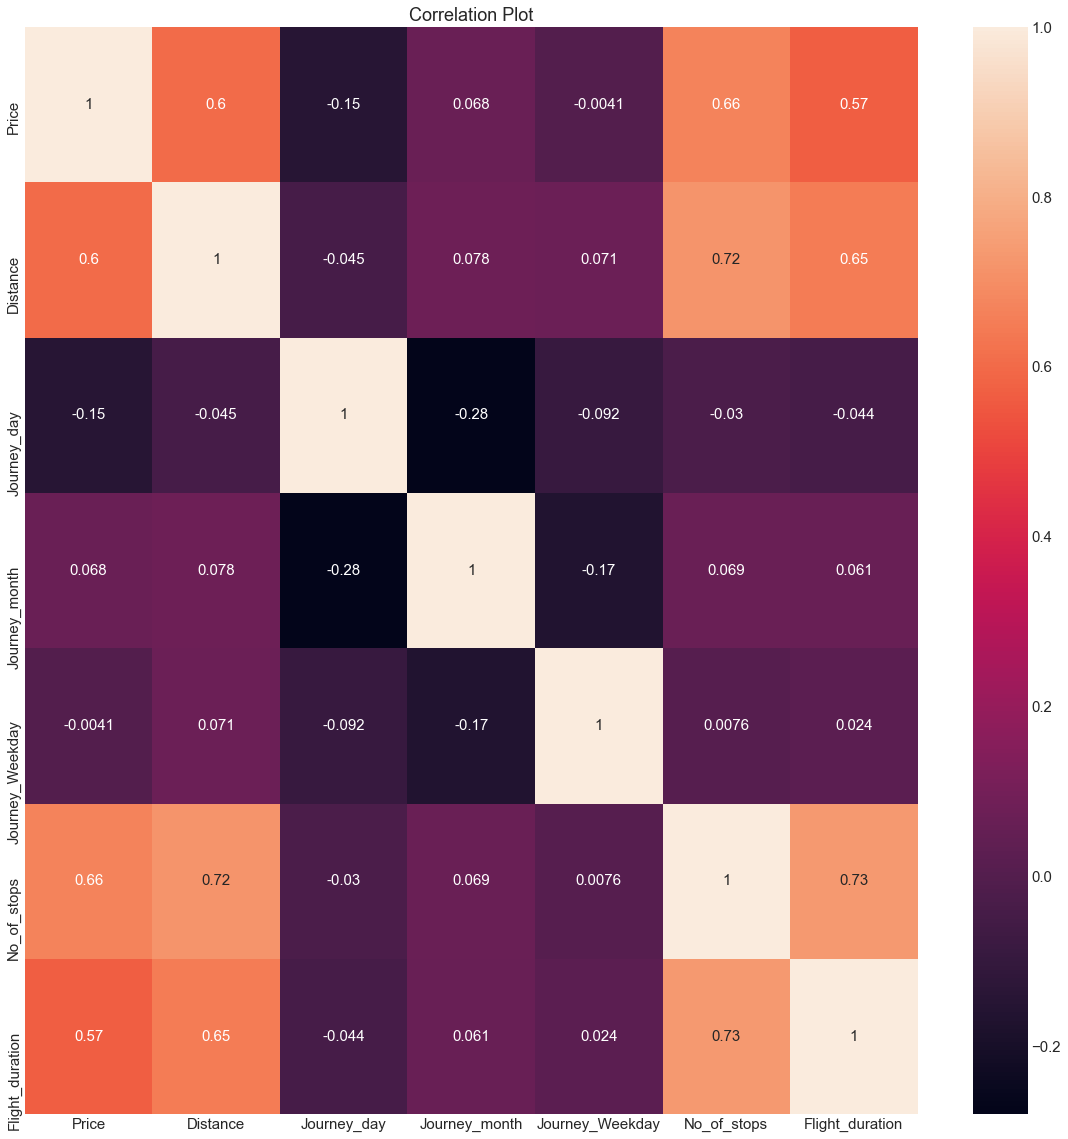

In [70]:
# plot 24  : Correlation Matrix.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Plot')
plt.show()

**Analysis**<br>
* The Correlation heat map shows different features correlation with each other.
* Where as non of the feature shows correaltion higher than 0.80 with other than itself.
* All this features are significant for linear model.

### <center>Machine Learning Models</center>

<u>**Basics of Machine Learning :**</u><br>

**Classification** and Regression are two major prediction problems that are usually dealt with machine learning. <br>

Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in input and then the labels are predicted for the data. <br>

The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The problems where the data can be divided into binary or multiple discrete labels is classification problem.<br>

**Regression** is the process of finding a model or function for distinguishing the data into continuous real values instead of using classes or discrete values. It can also identify the distribution movement depending on the historical data. Because a regression predictive model predicts a quantity, therefore, the skill of the model must be reported as an error in those predictions.<br>

>**According to this our problem can be identified as a 'Regression' problem**

**Linear regression**<br>
linear regression is useful for finding relationship between continuous variables. One is predictors or independent variables and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other.<br>

For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.<br>

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

#### Model Preprocessing

**Data Encoding**

The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

Categorical variables are usually represented as 'strings' or 'categories' and are finite in number.

For encoding categorical data, we have Lable Encoder and One Hot Encoding.

>**We used One Hot Encoding for transforming categorical data in this project.This encoding called as 'dummy variables'**

The dummy variable can be created by **pandas.get_dummies()** function.


In [71]:
# Encoding Categoricl Data :
model_data=pd.get_dummies(df)
model_data.Price=np.log(model_data.Price)
model_data.head()

,Price,Distance,Journey_day,Journey_month,Journey_Weekday,No_of_stops,Flight_duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New_Delhi,Destination_Banglore,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Flight_type_Connecting_Flight,Flight_type_Direct_Flight,flight_at_afternoon,flight_at_evening,flight_at_morning,flight_at_night
0,8.267962,1710.051469,24,3,6,0,170,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,8.944028,1839.051344,5,1,5,2,445,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,9.538348,2670.874218,6,9,4,2,1140,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,8.735204,1874.451294,5,12,3,1,325,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
4,9.495670,1743.166691,3,1,3,1,285,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0


In [72]:
# Test data encoding :
test_df=pd.get_dummies(test_df)

**Data Scaling**<br>

**Scaling Importance** : <br>
Feature scaling is the process of normalising the range of features in a dataset.Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

**Why choose Robust Scaling** :<br>
It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile(Q1) and 3rd quartile(Q3). i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.<br> 
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.<br>
RobustScaler uses the interquartile range so that it is robust to outliers. <br>Therefore its formula is as follows: 

$$Robust Scaling=\frac {x_i-Q_1(x)}{Q_3(x)-Q_1(x)}$$

In [73]:
# Scaling Data With Robust Scaler
x_scale=model_data.drop('Price',axis=1).copy()
scaler=RobustScaler()
scaler.fit(x_scale.iloc[:,:])
x_scale.iloc[:,:]=scaler.transform(x_scale.iloc[:,:])
x_scale.head()

,Distance,Journey_day,Journey_month,Journey_Weekday,No_of_stops,Flight_duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New_Delhi,Destination_Banglore,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Flight_type_Connecting_Flight,Flight_type_Direct_Flight,flight_at_afternoon,flight_at_evening,flight_at_morning,flight_at_night
0,-0.865464,1.1250,-0.666667,1.000000,-1.0,-0.452703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0
1,-0.638541,-0.0625,-1.333333,0.666667,1.0,-0.081081,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.824714,0.0000,1.333333,0.333333,1.0,0.858108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.576269,-0.0625,2.333333,0.000000,0.0,-0.243243,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.807211,-0.1875,-1.333333,0.000000,0.0,-0.297297,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
# Test data :
test_df.iloc[:,:]=scaler.transform(test_df.iloc[:,:])

**Train-Test Split Evaluation**

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

* <u>Train Dataset</u> : Used to fit the machine learning model.
* <u>Test Dataset</u>  : Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.

In [75]:
# Splitting Data For Model Building.
x_train, x_test, y_train, y_test = train_test_split(x_scale, model_data.Price, test_size = 0.30,random_state=100)

#### Models Building

##### Model Evaluation Function

In [76]:
# I stored all the models and their respective R2 and RMSE score
model_name=[]
train_R2=[]
test_R2=[]
train_RMSE=[]
test_RMSE=[]



# Function for evaluation of models
def model_evaluation(Model,xtrain,ytrain,xtest,ytest):
    model=Model.fit(xtrain,ytrain)
    y_train_pred=model.predict(xtrain)
    y_test_pred=model.predict(xtest)
    r2_train=metrics.r2_score(ytrain,y_train_pred)
    r2_test=metrics.r2_score(ytest,y_test_pred)
    
    model_name.append(Model)
    train_R2.append(r2_train)
    test_R2.append(r2_test)
    
    
    print('Model performance :')
    print(50*"-x")
    print('R2 train:{:.3f}  \nR2 test:{:.3f}'.format(r2_train,r2_test))
    rmse_train=np.sqrt(mean_squared_error(ytrain, y_train_pred))
    rmse_test=np.sqrt(mean_squared_error(ytest, y_test_pred))
    print("RMSE  (train data) : {:.3f}".format(rmse_train))
    print("RMSE  (test data) : {:.3f}".format(rmse_test))
    print(50*"-x")
    
    train_RMSE.append(rmse_train)
    test_RMSE.append(rmse_test)
    
    plt.figure(figsize=(12,6))
    ax1 = sns.distplot(ytrain,hist=False,color='red',label='Actual')
    sns.distplot(y_train_pred,hist=False,color='blue',label='Predicted',ax=ax1)
    plt.title('Actual vs Predited : Train')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,6))
    ax2 = sns.distplot(ytest,hist=False,color='red',label='Actual')
    sns.distplot(y_test_pred,hist=False,color='blue',label='Predicted',ax=ax2)
    plt.title('Actual vs Predited : Test')
    plt.legend()
    plt.show()
    return(model,y_train_pred,y_test_pred)

##### Ordinal Least Square

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent variables and a dependent variable (simple or multiple linear regression). Least squares stands for the minimum squares error (SSE). Maximum likelihood and Generalized method of moments estimator are alternative approaches to OLS. [(1)](#Reference)

Equations for the Ordinary Least Squares regression
In the case of a model with p explanatory variables, the OLS regression model writes:

$$ Y = \beta_0 + \Sigma_{j=1...p} \beta_jX_{ij}+\epsilon$$



In [77]:
# First adding constant for Intercept value B0

# Adding Constant for OLS
X_train=sm.add_constant(x_train)
X_test=sm.add_constant(x_test)# Constanct for the Intercept coefficent.

In [78]:
# Model Training and Summary:

# Ordinal Least square Model training 
model_OLS=sm.OLS(y_train,X_train)
results=model_OLS.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     872.6
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:18:00   Log-Likelihood:                 74.555
No. Observations:                7256   AIC:                            -91.11
Df Residuals:                    7227   BIC:                             108.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

**Model Interpritation**
* Covariance type nonrobust - The Variance is not minimized or eliminated.
* Degrees of freedom of residuals df=N-k-1= 7256-28-1= 7227
* R-square value - 77.2% of variance in model is explained by the model.
* Adjusted R-squared value - 77.1% signifies that it is very close to R-square showing the all model features are significant.and contibuting in dependant variable.
* The prob( F-statistic) value is 0.00 representing that the NULL HYPOTHESIS that Coefficent of Regression of all variables is 0
* 'Journey_weekday','Airline_Trueject','Additional_Info_Change airports','Additional_Info_1 Long layover' are having p-value greater than 0.05 showing it accepting the NULL HYPOTHESIS, And has no effect or no significance in regression.

In [79]:
# Testing results :
ols_result_train=pd.DataFrame()
ols_result_test=pd.DataFrame()
ols_result_train['actual']=y_train
ols_result_train['predicted']=results.predict(X_train)
ols_result_test['actual']=y_test
ols_result_test['predicted']=results.predict(X_test)

In [80]:
ols_result_train.head()

,actual,predicted
2580,9.814274,9.279894
8159,9.227984,9.176140
9772,8.571113,8.344684
7681,8.836810,9.211225
2775,9.601098,9.478028


Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train :0.772 
R2 test :0.777
RMSE  (train data) : 0.239
RMSE  (test data) : 0.236
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


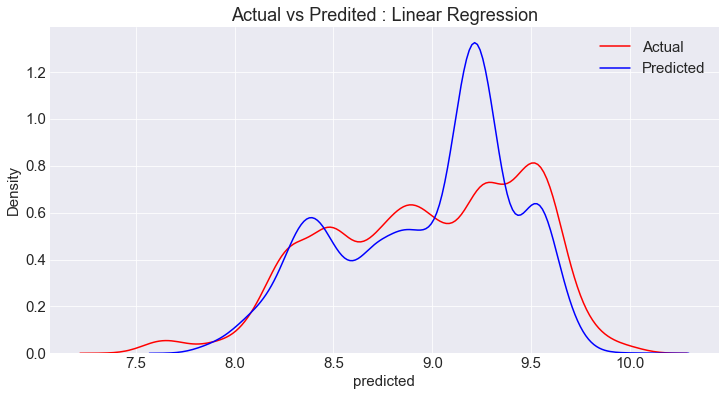

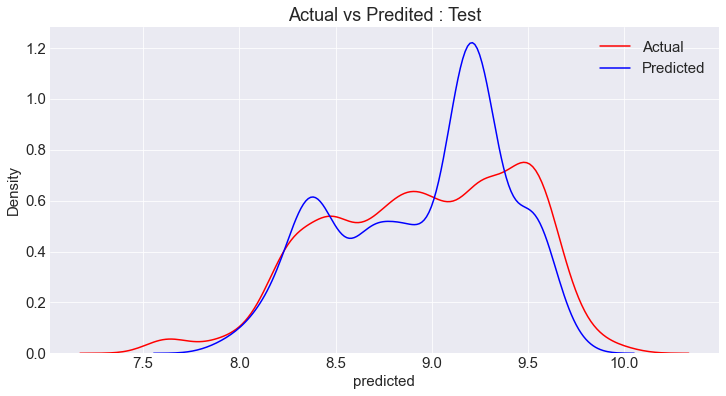

In [81]:

# Evaluation of OLS Model:

r2_train=metrics.r2_score(ols_result_train.actual,ols_result_train.predicted)
r2_test=metrics.r2_score(ols_result_test.actual,ols_result_test.predicted)

model_name.append('OLS Model')
train_R2.append(r2_train)
test_R2.append(r2_test)


print('Model performance :')
print(50*"-x")
print('R2 train :{:.3f} \nR2 test :{:.3f}'.format(r2_train,r2_test))
rmse_train=np.sqrt(mean_squared_error(ols_result_train.actual,ols_result_train.predicted))
rmse_test=np.sqrt(mean_squared_error(ols_result_test.actual,ols_result_test.predicted))
print("RMSE  (train data) : {:.3f}".format(rmse_train))
print("RMSE  (test data) : {:.3f}".format(rmse_test))
print(50*"-x")


train_RMSE.append(rmse_train)
test_RMSE.append(rmse_test)

plt.figure(figsize=(12,6))
ax1 = sns.distplot(ols_result_train.actual,hist=False,color='red',label='Actual')
sns.distplot(ols_result_train.predicted,hist=False,color='blue',label='Predicted',ax=ax1)
plt.title('Actual vs Predited : Linear Regression')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
ax2 = sns.distplot(ols_result_test.actual,hist=False,color='red',label='Actual')
sns.distplot(ols_result_test.predicted,hist=False,color='blue',label='Predicted',ax=ax2)
plt.title('Actual vs Predited : Test')
plt.legend()
plt.show()
#plot 25

#### Linear Regression Assumption Check

Regression is a parametric approach. 'Parametric' means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it's essential to validate these assumptions.

how would we check (validate) if a data set follows all regression assumptions? we check it using the regression plots (explained below).

**Important assumptions in regression analysis:**

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

5. The error terms must be normally distributed.

In [82]:
# Most of the assumptions requires Residuals of the model predictions :

def residuals_calculaton(model,independant_variables,dependant_variable):
    predictions = model.predict(independant_variables)
    results = pd.DataFrame({'Actual': dependant_variable, 'Predicted': predictions})
    results['Residuals'] = abs(results['Actual']) - abs(results['Predicted'])
    return results

In [83]:
# Creaating a Class that Checks all the assumptions.
class assumptions:
        
    #--------------------------------------------------------------------------------------------------#

    # assumption 1 : The independant and dependant variable create linear relationship
    def linear_assumption1(self,model,x_data,y_data):
   
        print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
        print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
        resid=residuals_calculaton(model,x_data,y_data)
        # Plotting the actual vs predicted values
        plt.figure(figsize=(8,8))
        sns.regplot(np.expm1(resid.Actual),np.expm1(resid.Predicted), scatter_kws=dict(color="blue"), line_kws=dict(color="red", linewidth=3))
        plt.title("Linear Regression Actual vs Predict Train Data")
        plt.xlabel("Actual Value")
        plt.ylabel("Predicit Value")
        plt.grid()
        plt.show()
        print('\n\tAssumption Verified')
    #------------------------------------------------------------------------------------------------------#
    # Assumption 2: Normality: Assumes that the error terms are normally distributed. If they are not, nonlinear transformations of variables may solve this.
    def Normality_assumption2(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 2 : Distribution of residuals is normal')
        print('\nFor Normal Distribution the Dsitribution plot below shows data concentrated around 0')
        print('\nThe Probablity plot shows how normally error is distributed by showing most of the points around line')

        f = plt.figure(facecolor='whitesmoke', figsize=(15, 5))

        ax_left1 = f.add_axes([0,0,0.5,1], facecolor='whitesmoke')
        sns.distplot(resid.Residuals,kde=True,ax=ax_left1)
        plt.title('Distribution of Residuals')
        ax_right1 = f.add_axes([0.50,0,0.5,1], facecolor='whitesmoke')
        probplot(resid.Residuals,fit=True,plot=ax_right1)
        plt.show()
        print('\n\tAssumption Verified')

    #------------------------------------------------------------------------------------------------------------#

    # Assumption 3 :mean of residuals is equal to  0
    def Residualmean_assumption3(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 3 : Mean of residuals is 0')
        print('\nResidual mean for training data :',abs(np.mean(resid.Residuals)))
        # Plotting Residuals.
        plt.figure(figsize=(12,6))
        sns.residplot(resid.Actual,resid.Predicted)
        plt.title('Residual plot for Training data')
        plt.show()
        print('\n\tAssumption Verified')

    #-------------------------------------------------------------------------------------------------------------#
     # Assumption 4 :Homoscedasticity: Assumes that the errors exhibit constant variance
    def homoscedasticity_assumption4(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 4: Homoscedasticity of Error Terms', '\n')
        print('Residuals should have relative constant variance')
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=resid.index, y=resid.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, resid.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals Variance')
        plt.show()
        print('\n\tAssumption Verified')
     #--------------------------------------------------------------------------------------------------#

    # Assumption 5 : No autocorrelation occurs between residual errors
    def autocorrelation_assumption5(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 5: Auto-Corelation in residuals', '\n')
        print('Residuals should not show autocorelation')
        print('The below Correlogram shows the Correlation coefficient on the Y-Axis and the time lag of that correlation, on the X-Axis.\nif correlation value is high the instances will cross significance boundry and if there is no upward or downward pattern while traversing through the X-Axis,\nthe possibilities of serial correlation can be demolished.')
        acf=smt.graphics.plot_acf(resid.Residuals)
        
        print('\n\tAssumption Verified')

    #-----------------------------------------------------------------------------------------------------#

    

In [84]:
# Linear regression by sklearn
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [85]:
# Instance of class
asm=assumptions()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


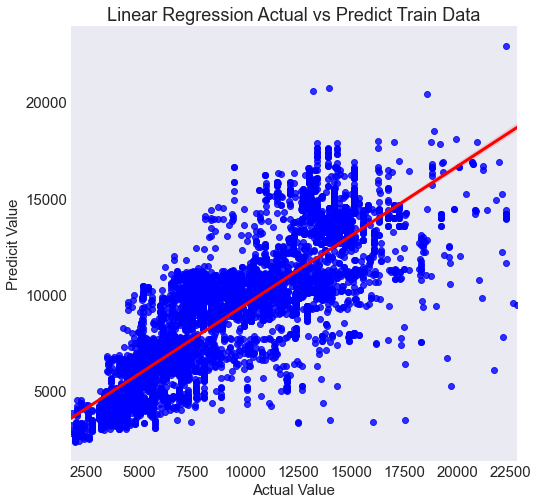


	Assumption Verified


In [86]:
# Assumption 1: 
asm.linear_assumption1(linear_model,x_train,y_train)
#plot 26

Assumption 2 : Distribution of residuals is normal

For Normal Distribution the Dsitribution plot below shows data concentrated around 0

The Probablity plot shows how normally error is distributed by showing most of the points around line


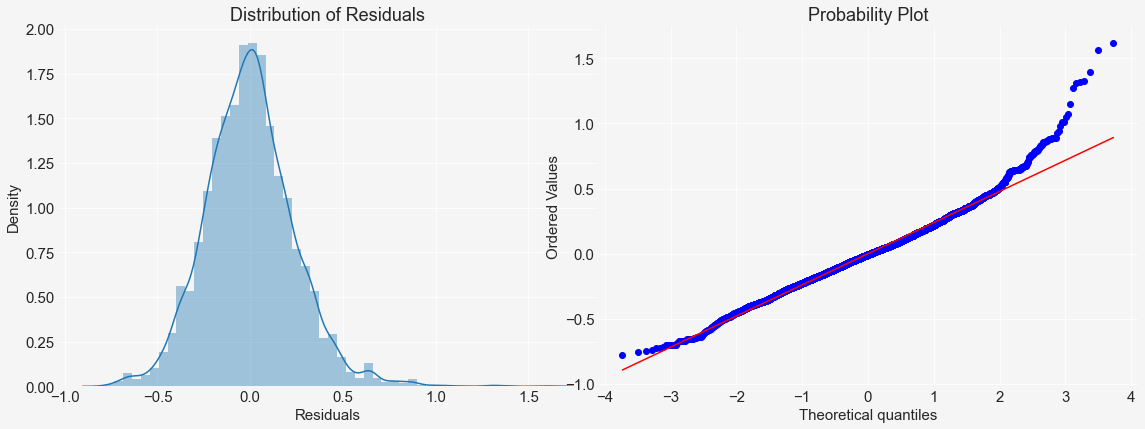


	Assumption Verified


In [87]:
# Assumption 2: 
asm.Normality_assumption2(linear_model,x_train,y_train)
#plot 27

Assumption 3 : Mean of residuals is 0

Residual mean for training data : 0.0007273760356636905


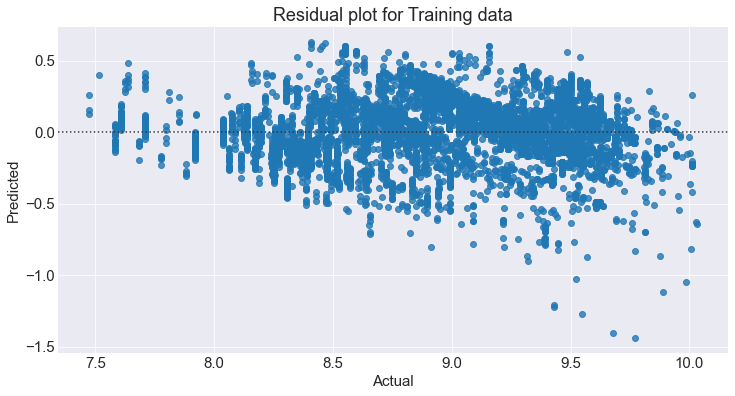


	Assumption Verified


In [88]:
# Assumption 3: 
asm.Residualmean_assumption3(linear_model,x_train,y_train)
#plot 28

Assumption 4: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


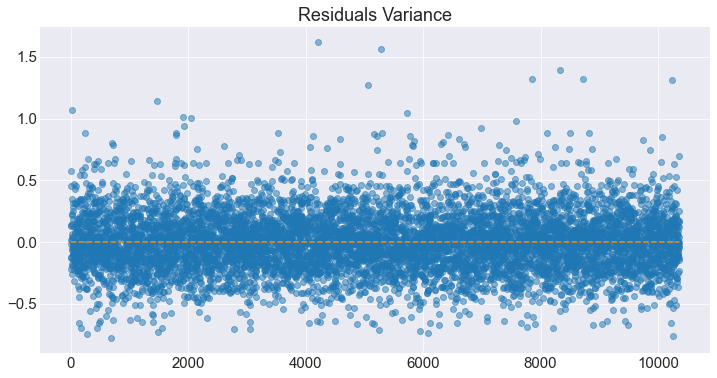


	Assumption Verified


In [89]:
# Assumption 4: 
asm.homoscedasticity_assumption4(linear_model,x_train,y_train)
#plot 28

Assumption 5: Auto-Corelation in residuals 

Residuals should not show autocorelation
The below Correlogram shows the Correlation coefficient on the Y-Axis and the time lag of that correlation, on the X-Axis.
if correlation value is high the instances will cross significance boundry and if there is no upward or downward pattern while traversing through the X-Axis,
the possibilities of serial correlation can be demolished.

	Assumption Verified


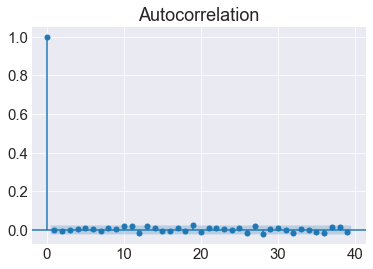

In [90]:
# Assumption 5: 
asm.autocorrelation_assumption5(linear_model,x_train,y_train)
#plot 29

**All Linear regression Assumption are verified.Hence the model is significant and the prediction are valid**

##### Decision Tree Regressor

This tree count isolates the collected information into small subsets, at a comparative same time makes it persistent. The last results show the tree having the decision centres, likewise, the leaf centres. This decision centre point may contain two branches at any rate. At first think about the whole informational index as root. Feature regards are kicked out of
the chance. In case the characteristics are relentless then they have to be discretized before structuring the model. In view of estimation property records are corrected recursively.Information Gain and Gini index are two essential properties in the decision of tree computation. Information Gain is defined as the amount change in entropy. Higher entropy indicates more effectiveness of the substance. Thus the entropy is a proportion of vulnerability of arbitrary variable. Gini Index
measures how regularly an arbitrarily picked component would be falsely recognized. It implies a characteristic with a lower
Gini index ought to be liked. For Regression tree, cost capacity can be a basic squared condition:

$$E=\sum(y-\hat{y})^2$$

Where y is the actual value from the dataset and y cap is predicted value. Having a class with the maximum number of
an expected value obtained by the split function called information gain. If the class is kept splitting and splitting without any condition at the leaf node, the algorithm will be huge, slow and over fitted. To stop this, a minimum count on
the training example on the leaf node is assigned.[(2)](#Reference)


Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.994  
R2 test:0.907
RMSE  (train data) : 0.040
RMSE  (test data) : 0.153
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


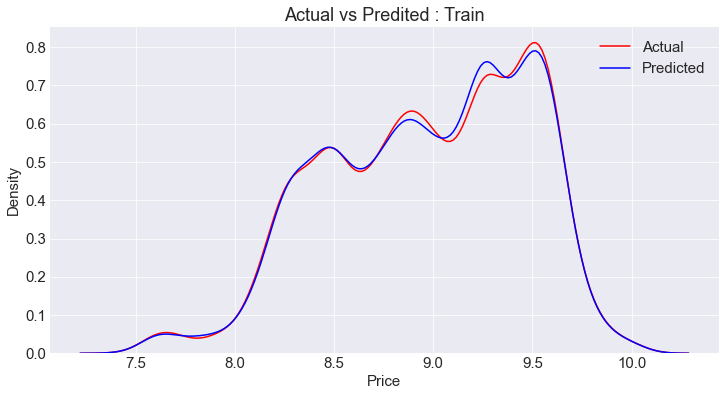

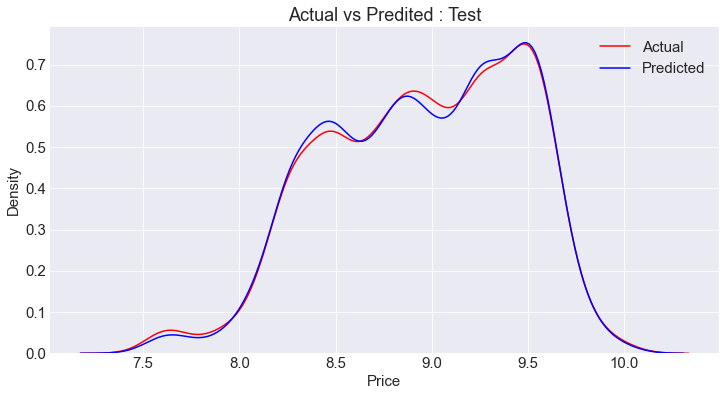

In [91]:
# Decision Tree Model
model_TREE=DecisionTreeRegressor()
model_tree,train_pred_DT,test_pred_DT=model_evaluation(model_TREE,x_train,y_train,x_test,y_test)
#plot 30

##### K-Nearest Neighbors Regressor

In k-nearest neighbour regression analysis, the output is mean of its k nearest neighbours. Like SVM this is also a nonparametric method. Considering few values, results are computed to achieve the best value. KNN is a supervised
classification algorithm that can also be used as a regressor. It assigns a new data point to the class. It is non-parametric
because it does not take any assumption. It calculates the distance between every training example and a new data
point. To compute this distance following distance calculation methods are used:[(2)](#Reference)
* Euclidean Distance
$$ED=\sqrt{\sum_{i=1}^{k}(x_i-y_i)^2}$$

* Manhatten distance
$$MD={\sum_{i=1}^{k}|x_i-y_i|}$$


Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.898  
R2 test:0.841
RMSE  (train data) : 0.160
RMSE  (test data) : 0.199
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


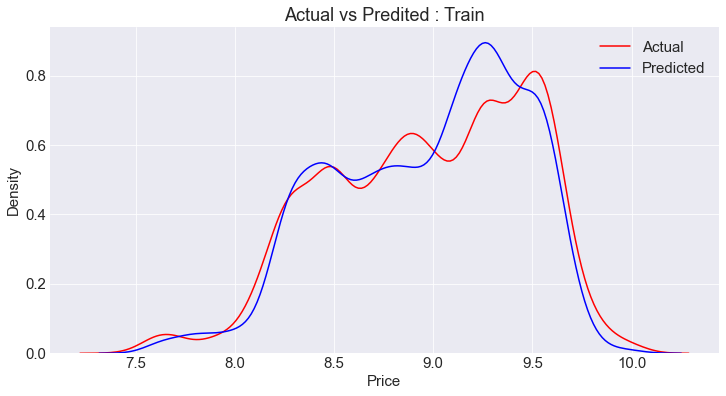

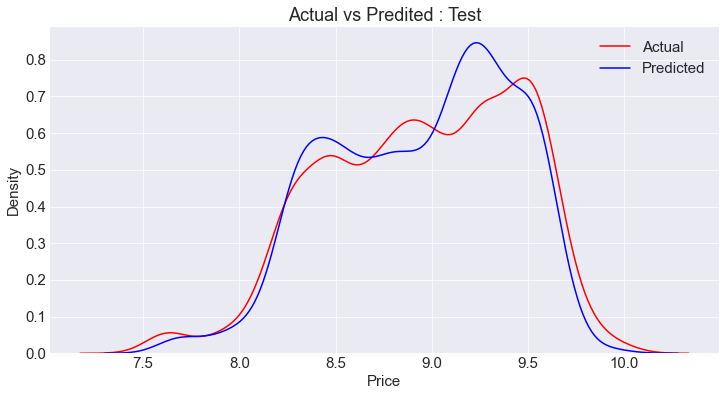

In [92]:
# Creating Base Model :
model_KNN=KNeighborsRegressor() #using defualt distance parameter as Euclidean Distance
model_knn,train_pred_knn,test_pred_knn=model_evaluation(model_KNN,x_train,y_train,x_test,y_test)
#plot 31

#### Ensemble Models

Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.

Although there are a seemingly unlimited number of ensembles that you can develop for your predictive modeling problem, there are three methods that dominate the field of ensemble learning.each is a field of study that has spawned many more specialized methods.

The three main classes of ensemble learning methods are bagging, stacking, and boosting, and it is important to both have a detailed understanding of each method and to consider them on your predictive modeling project.
* Bagging involves fitting many decision trees on different samples of the same dataset and averaging the predictions.
* Stacking involves fitting many different models types on the same data and using another model to learn how to best combine the predictions.
* Boosting involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.

Some of the Ensemble models I used are  :
* Random Forest Regressor
* Gradient Boosting Regressor
* AdaBoost Regressor

I Compare this all model to find the perfect model giving good performance on data.

##### Random Forest Regressor

Random Forest is an ensemble learning technique where training model uses multiple learning algorithms and then combine individual results to get a final predicted result.Under ensemble learning random forest falls into bagging category where random number of features and records will be selected and passed to the group of models. Random forest basically uses group of decision trees as group of models.Random amount of data is passed to decision trees and each
decision tree predicts values according to the dataset given to it. From the predictions made by the decision trees the average value of the predicted values if considered as the output of the random forest model.

Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.987  
R2 test:0.938
RMSE  (train data) : 0.057
RMSE  (test data) : 0.124
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


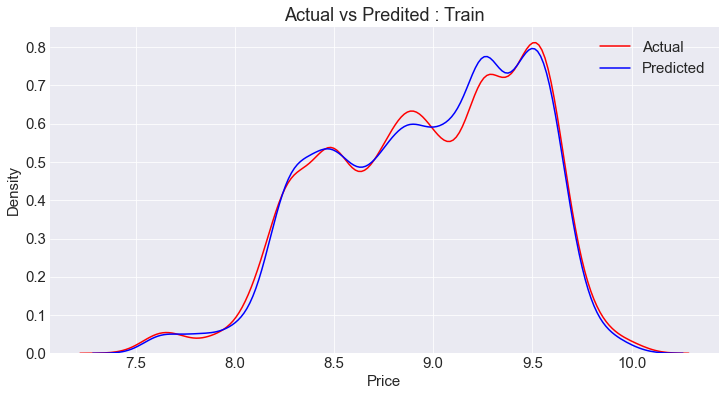

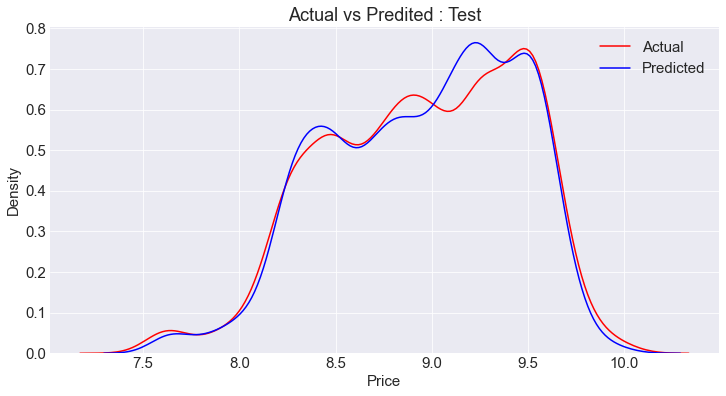

In [93]:
# Random forest Regressor
model_RFR=RandomForestRegressor()
model_rfr,train_pred_rfr,test_pred_rfr=model_evaluation(model_RFR,x_train,y_train,x_test,y_test)
#plot 32

**Feature Selection by Random Forest**

In [94]:
feature_imp=pd.DataFrame() # DataFrame to store feature importance
feature_imp['Feature']=x_train.columns # Features
feature_imp['importance']=(model_rfr.feature_importances_)*100 # Importance in 100 percentile
feature_imp.sort_values('importance',ascending=False).T

,5,1,10,0,28,2,4,9,3,11,30,36,7,13,15,37,6,21,34,18,35,23,8,12,17,24,22,19,20,16,25,33,32,29,26,14,27,31
Feature,Flight_duration,Journey_day,Airline_Jet Airways,Distance,Additional_Info_In-flight meal not included,Journey_month,No_of_stops,Airline_IndiGo,Journey_Weekday,Airline_Multiple carriers,Additional_Info_No info,flight_at_morning,Airline_Air India,Airline_SpiceJet,Airline_Vistara,flight_at_night,Airline_Air Asia,Destination_Banglore,flight_at_afternoon,Source_Kolkata,flight_at_evening,Destination_Hyderabad,Airline_GoAir,Airline_Multiple carriers Premium economy,Source_Chennai,Destination_Kolkata,Destination_Cochin,Source_Mumbai,Source_New_Delhi,Source_Banglore,Destination_New_Delhi,Flight_type_Direct_Flight,Flight_type_Connecting_Flight,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Airline_Trujet,Additional_Info_Change airports,Additional_Info_Red-eye flight
importance,60.819749,7.397318,6.375679,5.819443,3.88381,2.570589,1.949004,1.388907,1.352094,1.317798,1.032153,0.952076,0.680577,0.661333,0.520101,0.469325,0.4328,0.310128,0.290865,0.280673,0.242252,0.184564,0.153621,0.130716,0.128532,0.113568,0.106919,0.106114,0.101902,0.080877,0.071272,0.04531,0.0173,0.008733,0.001565,0.001329,0.000994,0.000007


* Features that show very less importance from random forest feature importance :
    1. Additional_Info_No check-in baggage included
    2. Additional_Info_1 Long layover
    3. Airline_Trujet
    4. Additional_Info_Change airports
    5. Additional_Info_Red-eye flight
* The Feature importance are nearly 0 but not exactly 0.
* As from OLS result shows same significance for this features, the Adjusted $R^2$ has not much effect by this features.
* **So to have more features in model I avoide to remove this features as it has close to none effect on results.** 

##### Gradient Boosting Regressor

Gradient boosting is one of the most powerful techniques for building predictive models.

Gradient boosting involves three elements:
* A loss function to be optimized.
* A weak learner to make predictions.
* An additive model to add weak learners to minimize the loss function.

1. Loss Function
The loss function used depends on the type of problem being solved.
It must be differentiable, but many standard loss functions are supported and you can define your own.
For example, regression may use a squared error and classification may use logarithmic loss.
A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

2. Weak Learner
Decision trees are used as the weak learner in gradient boosting.
Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and 'correct' the residuals in the predictions.
Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss.
It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.
This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.

3. Additive Model
Trees are added one at a time, and existing trees in the model are not changed.
A gradient descent procedure is used to minimize the loss when adding trees.
Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.
Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss).

Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.890  
R2 test:0.879
RMSE  (train data) : 0.166
RMSE  (test data) : 0.174
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


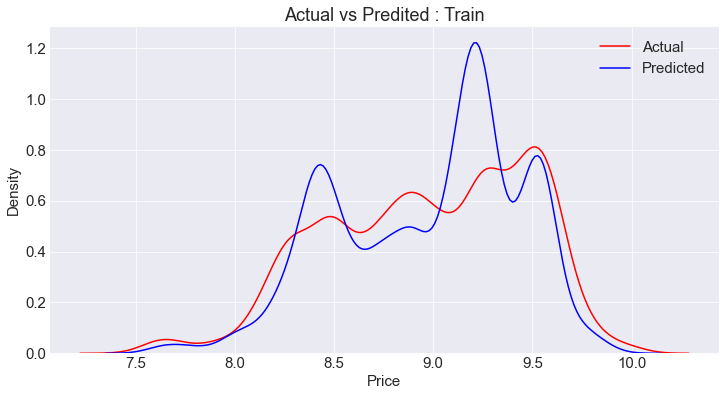

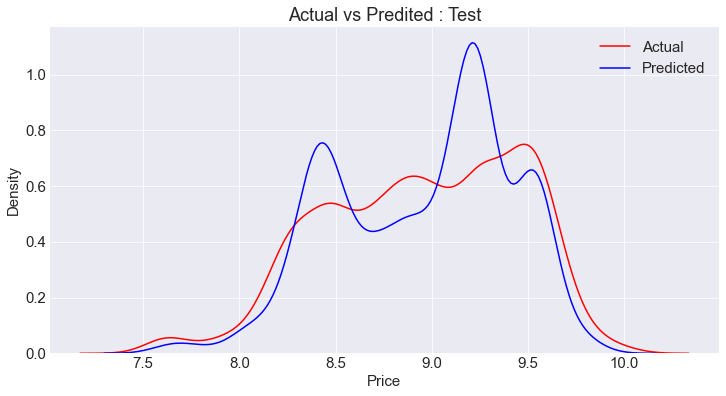

In [95]:
# Gradient Boosting Regressor
model_GB=GradientBoostingRegressor() #Gradient boosting base model
model_gb,train_pred_gb,test_pred_gb=model_evaluation(model_GB,x_train,y_train,x_test,y_test)
#plot 33

##### AdaBoost Regressor-Decision Tree

The first realization of boosting that saw great success in application was Adaptive Boosting or AdaBoost for short.
Adaboost helps you combine multiple 'weak regressor' into a single 'strong regressor'

* The weak learners in AdaBoost are decision trees with a single split, called decision stumps.<br>
* AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.<br>
* AdaBoost algorithms can be used for both classification and regression problem.<br>

Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.965  
R2 test:0.919
RMSE  (train data) : 0.093
RMSE  (test data) : 0.143
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


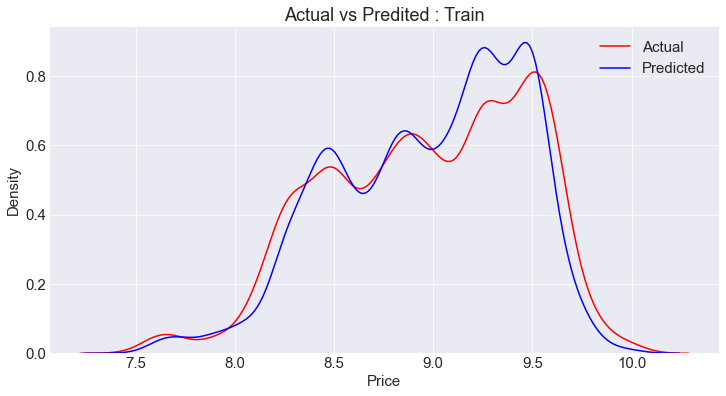

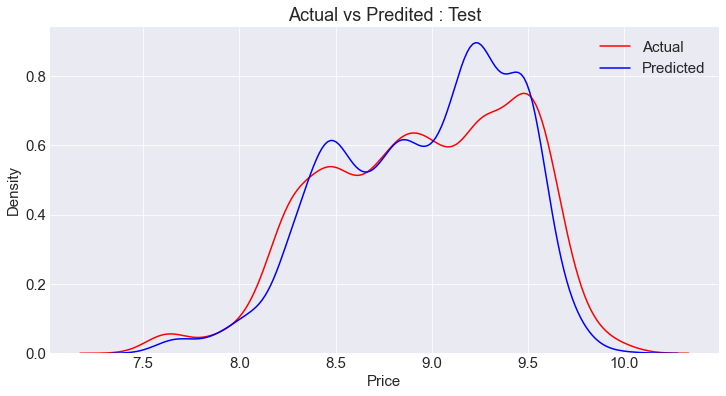

In [96]:
# AdaBoost Regressor
model_ADA=AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=100)
model_ada,train_pred_ada,test_pred_ada=model_evaluation(model_ADA,x_train,y_train,x_test,y_test)
#plot 34

#### Model Performance Evaluation

We cannot calculate accuracy for a regression model.

The skill or performance of a regression model must be reported as an error in those predictions.
There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model, they are:

1. Coefficent of Determination ($R^2$)
2. Root Mean Squared Error (RMSE).
3. Mean Absolute Error (MAE)

**I have taken 'RMSE' and '$R^2$' as evaluation criteria for models in this Notebook**

* Coefficent of Determination<br>
    The coefficient of determination, R2, is used to analyze how differences in one variable can be explained by a difference in a second variable.<br>
    $$ R^2 = 1-\frac{RSS}{TSS} $$
    
    **RSS=Residual Sum of square errors<br>
    TSS= Total Sum of square errors**<br>
<br>
* Root Mean Squared Error<br>
    The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.<br>
    Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.<br>
    As such, it may be common to use RMSE to evaluate and report its performance.<br>

    The RMSE can be calculated as follows:<br>

     $$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}(y_i – \hat{y_{i}})^2} $$
     
    We can restate the RMSE in terms of the MSE as:

    $ RMSE = \sqrt(MSE)$


In [97]:
# Creating a dataframe of results
Results=pd.DataFrame()
Results['Model']=['OLS','DT','KNN','Random Forest','Gradient Boosting','Adaboost(DT)']
Results['R2_Train']=train_R2
Results['R2_Test']=test_R2
Results['RMSE_Train']=train_RMSE
Results['RMSE_Test']=test_RMSE


In [98]:
# Function to automatically decide the results conclusion 
def Model_Overview(df):
        if df['R2_Train']==1.00:    # I am considering any model having R2 score of 1 as overfitted model
            return ('Overfit')
        else:
            if df['R2_Train']<0.85:    # According to refrence papers , I decide any model having score less than 0.85 as low performance model
                return('Low score')
            elif df['R2_Train']-df['R2_Test'] >0.02:  # Whereas there are models gives score more than 0.85 but the performance
                return('varience in train and test Score')    #on test has significant differance, deu to high variance.
            else :
                return('Good Model') # The model which is not in above categories considerd as good model.

In [99]:
Results['Overview']=Results.apply(lambda x: Model_Overview(x),axis=1) # applying functioin to each row
Results

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,Overview
0,OLS,0.771732,0.776759,0.239497,0.236432,Low score
1,DT,0.993527,0.907069,0.040331,0.152546,varience in train and test Score
2,KNN,0.897721,0.841197,0.160314,0.199411,varience in train and test Score
3,Random Forest,0.987013,0.938480,0.057126,0.124116,varience in train and test Score
4,Gradient Boosting,0.889831,0.879419,0.166382,0.173763,Good Model
5,Adaboost(DT),0.965452,0.918725,0.093173,0.142659,varience in train and test Score


**Summary Of all Models**


* OLS - Ordinal Least Square has good score.But it is lower than other models.
* DT - Decision Tree regressor has train R2 equals to nearly 1.00 and testing score is far away than train showing overfitted model.
* KNN - K-Nearest Neighbours regressor Performed good but has low score than other models.
* Ensemble Model- Random Forest regressor performed very good but differnce in train test score shows high varience in result prediction.
* Ensemble Model- Gradient Boosting Regressor shows very good score and performce.
* Ensemble Model- Adaboost regressor with Decision tree as Week Learner shows good result but overfit .Hyperparamter Tuning required.


**Models Conclusion** <br>
>>I chose **Ensemble Model - Gradient Boosting regressor** As the performnce is better Than other models.


#### Cross Validation

K-fold cross-validation is one of the most popular strategies widely used for model validation. It is a data partitioning strategy so that one can effectively use dataset to build a more generalized model. The main intention of doing any kind of machine learning is to develop a more generalized model which can perform well on unseen data.

K-Fold cross-validation is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point.

In [100]:
# function to find cross validation score 
cv_score=[]
def cross_validation(model,x,y,n):
    # prepare the cross-validation procedure
    cv = KFold(n_splits=n, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, x,y, scoring = 'r2', cv=cv, n_jobs=-1)
    cv_score.append(np.mean(scores))
    # report performance
    return

In [101]:
# Cross validation for DT,KNN,RFR,GB,ADA models:
cross_validation(model_tree,x_train,y_train,10)
cross_validation(model_knn,x_train,y_train,10)
cross_validation(model_rfr,x_train,y_train,10)
cross_validation(model_gb,x_train,y_train,10)
cross_validation(model_ada,x_train,y_train,10)

In [102]:
cv_results=Results[['Model','R2_Train','R2_Test']][1:]
cv_results['cv_score']=cv_score
cv_results

,Model,R2_Train,R2_Test,cv_score
1,DT,0.993527,0.907069,0.901823
2,KNN,0.897721,0.841197,0.836625
3,Random Forest,0.987013,0.938480,0.936583
4,Gradient Boosting,0.889831,0.879419,0.882109
5,Adaboost(DT),0.965452,0.918725,0.922387


**Cross Validation Analysis**

|Model|R2 train|R2 test|Cross validation R2|
|-----|---------|------|-------------------|
|Gradient boosting model|0.889|0.879|0.882|


>>**The Cross validation R2 score for Gradient Boosting Regressor validates the model Performance better than other models**

#### Hyperparamter Tuning

Machine learning models have hyperparameters that  must set in order to customize the model to your dataset.<br>
Often the general effects of hyperparameters on a model are known, but how to best set a hyperparameter and combinations of interacting hyperparameters for a given dataset is challenging. There are often general heuristics or rules of thumb for configuring hyperparameters.<br>
A better approach is to objectively search different values for model hyperparameters and choose a subset that results in a model that achieves the best performance on a given dataset. This is called hyperparameter optimization or hyperparameter tuning.<br>

There are a range of different optimization algorithms may be used for tuning a model, although two of the simplest and most common methods are random search and grid search.

* Random Search: Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.
* Grid Search: Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

>Grid search is great for spot-checking combinations that are known to perform well generally. Random search is great for discovery and getting hyperparameter combinations that you would not have guessed intuitively, although it often requires more time to execute.
>>**Hence I used RandomizedSearchCV for tuning model.**

**Gradient Boost regressor Hyperparamter tuned Model**

In [103]:
# Tuning Gradient Boost using RandomizedSearchCV
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 
                'learning_rate': [0.01, 0.05, 0.1], 
                'n_estimators': [100, 200, 300, 400, 500]}

model_gb = RandomizedSearchCV(model_GB, tuned_params, n_iter=10,scoring='r2',cv=5, n_jobs=-1)

Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.968  
R2 test:0.941
RMSE  (train data) : 0.089
RMSE  (test data) : 0.121
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


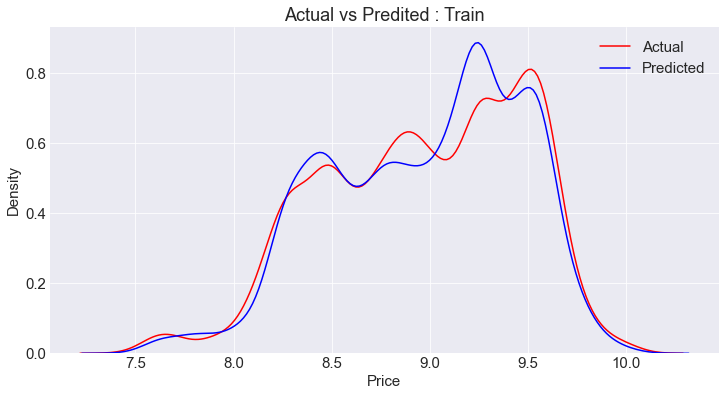

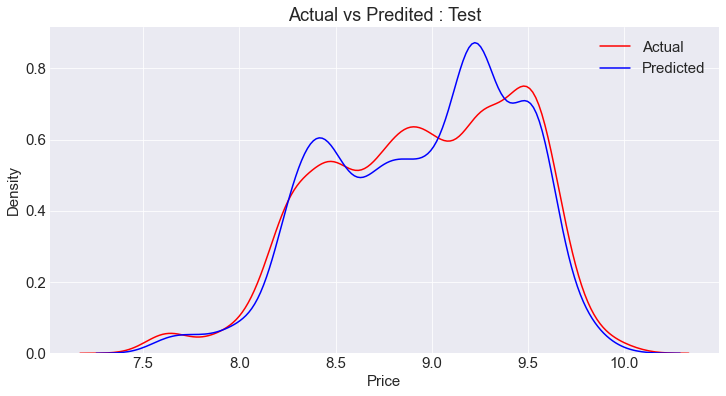

In [104]:
# Evaluation of Hypertuned model Performance
final_model_GB,train_pred_final,test_pred_final=model_evaluation(model_gb,x_train,y_train,x_test,y_test)
#plot 35

In [105]:
# best Paramters used by the model.
final_model_GB.best_params_

{'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1}

**Hyperparameter tuned Model Analysis**

|Model|R2 train|R2 test|Cross validation R2|Hypertuned R2 train|Hypertuned R2 test|
|-----|---------|------|-------------------|-------------|--------------------|
|Gradient boosting model|0.889|0.879|0.882|0.968|0.941|


>>**Gradient Boost Regressor model has improved performance after Tuning.**

#### Optimized Gradient Boosting Algorithms

##### XGBoost Regressor

XGBoost is one of the most popular variants of gradient boosting. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost is basically designed to enhance the performance and speed of a Machine Learning model. In prediction problems involving unstructured data (images, text, etc.), artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree-based algorithms are considered best-in-class right now. 

XGBoost uses pre-sorted algorithm & histogram-based algorithm for computing the best split. The histogram-based algorithm splits all the data points for a feature into discrete bins and uses these bins to find the split value of the histogram. Also, in XGBoost, the trees can have a varying number of terminal nodes and left weights of the trees that are calculated with less evidence is shrunk more heavily.

Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.973  
R2 test:0.943
RMSE  (train data) : 0.083
RMSE  (test data) : 0.119
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


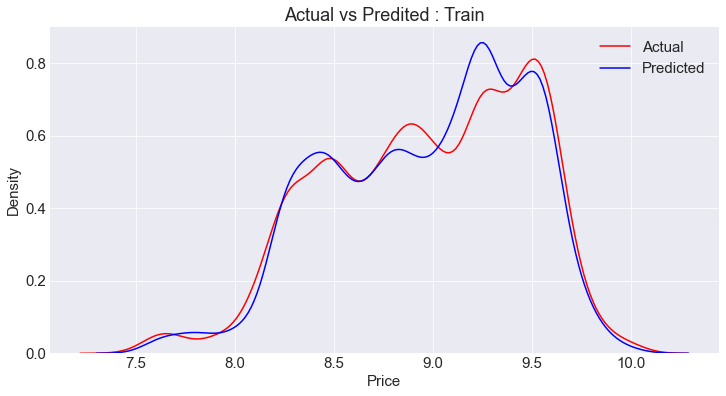

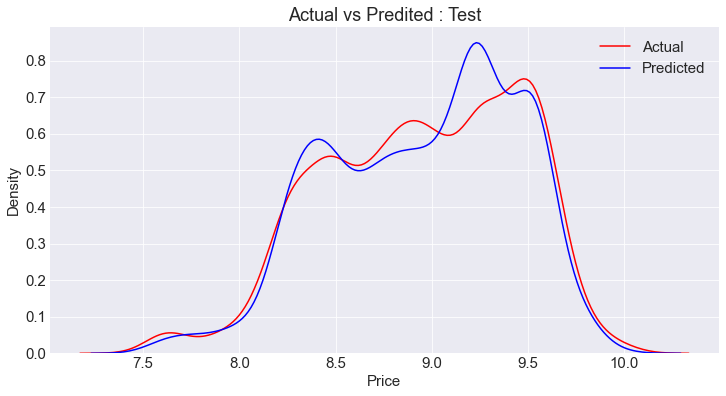

In [106]:
# XGBboost Regresor
model_xgb=XGBRegressor()
# Evaluation of XGBRegressor Performance
model_XGB,train_pred_xgb,test_pred_xgb=model_evaluation(model_xgb,x_train,y_train,x_test,y_test)
#plot 36

##### Light Gradient Boost Regressor

LightGBM stands for lightweight gradient boosting machines. It uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value. LightGBM is prefixed as 'Light' because of its high speed. LightGBM is popular as it can handle the large size of data and takes lower memory to run. 

Another reason why LightGBM is popular is as it focuses on the accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

It can also handle categorical features by taking the input of feature names. It does not convert to one-hot coding and is much faster than one-hot coding. LGBM uses a special algorithm to find the split value of categorical features. Both LighGBM and XGBoost grow the trees leaf wise.

Model performance :
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
R2 train:0.943  
R2 test:0.923
RMSE  (train data) : 0.120
RMSE  (test data) : 0.138
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


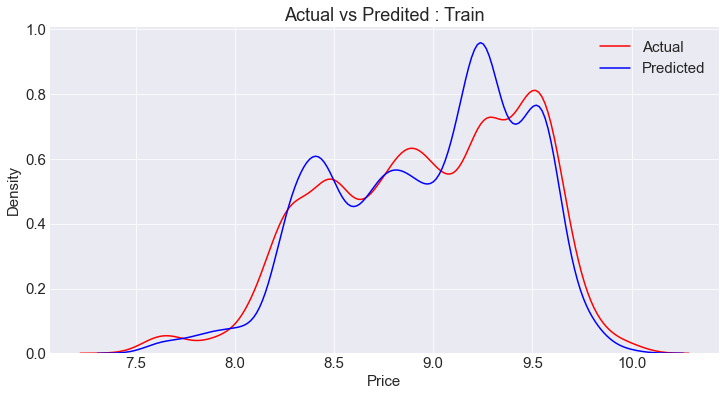

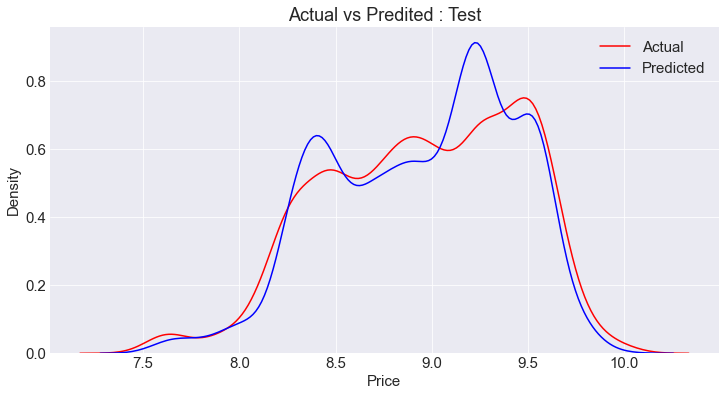

In [107]:
model_lgbm=LGBMRegressor()
model_LGBM,train_pred_lgbm,test_pred_lgbm=model_evaluation(model_lgbm,x_train,y_train,x_test,y_test)
#plot 37

**Summary of Optimized Algorithms**

|model|R2_train|R2_test|RMSE_train|RMSE_test|
|-----|--------|-------|----------|---------|
|XGBoost|0.973|0.943|0.083|0.119|
|LGBM regressor|0.943|0.923|0.120|0.138|

>> **XGBoost Regressor performs best in the optimized Gradient Boosting Algorithms**

### <center>Summary</center>

**The Summary of all the models is:**

In [108]:
Results=pd.DataFrame()
Results['Model']=['OLS','DT','KNN','Random Forest','Gradient Boosting','Adaboost(DT)',\
                  'Tuned Gradient Boost','XGBoost','LGBoost']
Results['R2_Train']=train_R2
Results['R2_Test']=test_R2
Results['RMSE_Train']=train_RMSE
Results['RMSE_Test']=test_RMSE
Results

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test
0,OLS,0.771732,0.776759,0.239497,0.236432
1,DT,0.993527,0.907069,0.040331,0.152546
2,KNN,0.897721,0.841197,0.160314,0.199411
3,Random Forest,0.987013,0.938480,0.057126,0.124116
4,Gradient Boosting,0.889831,0.879419,0.166382,0.173763
5,Adaboost(DT),0.965452,0.918725,0.093173,0.142659
6,Tuned Gradient Boost,0.968277,0.941464,0.089282,0.121068
7,XGBoost,0.972701,0.943080,0.082824,0.119386
8,LGBoost,0.942690,0.923423,0.120003,0.138474


>> **From Summary it is seen that for the Flight Price Prediction Dataset XGBoost Performs very well over other models** 

**Predictions On Test Dataset**

In [109]:
test['Predicted Fare']=np.expm1(model_XGB.predict(test_df))

In [110]:
test.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted Fare
23,Jet Airways,9/05/2019,New_Delhi,Cochin,DEL → JAI → BOM → COK,05:30,19:00,13h 30m,2 stops,In-flight meal not included,14445.920898
1621,GoAir,09/03/2019,Banglore,New_Delhi,BLR → DEL,11:40,14:35,2h 55m,non-stop,No info,6945.015137
1010,Jet Airways,1/06/2019,Banglore,New_Delhi,BLR → DEL,11:10,14:05,2h 55m,non-stop,No info,7585.501953
2309,Air India,21/03/2019,Banglore,New_Delhi,BLR → VGA → HYD → DEL,10:30,21:25,10h 55m,2 stops,No info,6386.165527
1982,IndiGo,27/05/2019,Chennai,Kolkata,MAA → CCU,11:35,14:00,2h 25m,non-stop,No info,3843.916016
1558,Jet Airways,9/06/2019,New_Delhi,Cochin,DEL → BOM → COK,07:05,12:35,5h 30m,1 stop,No info,14272.598633
928,SpiceJet,15/05/2019,New_Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5377.527344
1597,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,19:40,13h 10m,1 stop,In-flight meal not included,13715.984375
384,GoAir,27/05/2019,New_Delhi,Cochin,DEL → BOM → COK,10:35,19:35,9h,1 stop,No info,6055.232910
867,Jet Airways,15/06/2019,New_Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,No info,14902.909180


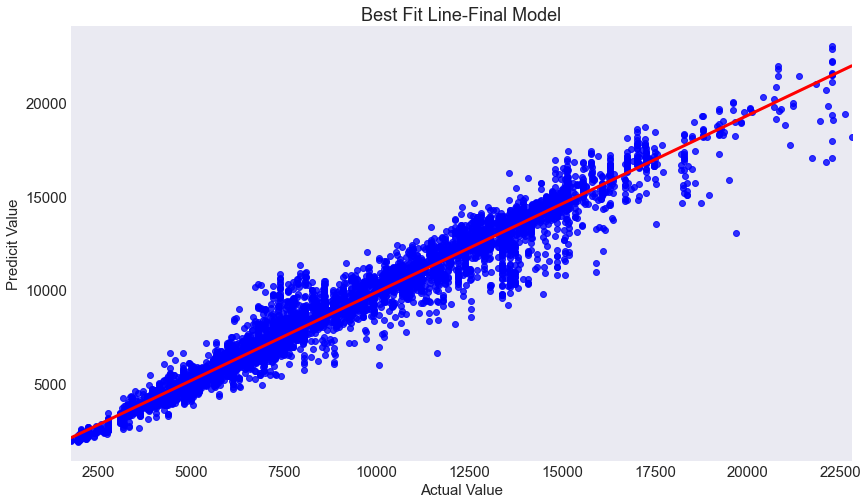

In [111]:
# Plotting the actual vs predicted values
plt.figure(figsize=(14,8))
sns.regplot(np.expm1(y_train),np.expm1(train_pred_xgb), scatter_kws=dict(color="blue"), line_kws=dict(color="red", linewidth=3))
plt.title("Best Fit Line-Final Model")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.grid()
plt.show()

### <center>Conclusion</center>

**This project shows that it is feasible to predict Flight Fare based on historical data.Regression algorithms can be useful to perform predictions of prices.There are different algorithms based on regression, Out of which some of them I used in this project.The Dataset I used has best results with Gradient Boosting Models.XGBoost gives best R2 score and lowest RMSE value.This model can be used to perform predictions based on the change of provided features.** 

In [112]:
# Saving the Model for future use :
joblib.dump(model_XGB,'Flight_LogPrice_Prediction.obj')

['Flight_LogPrice_Prediction.obj']

In [113]:
# Saving Robust Transformation 
joblib.dump(scaler,'Flight_dataScaler.obj')

['Flight_dataScaler.obj']

- **contribution From Project**
    - This project will be useful to predict the prices as a forcast for airline as well as customers.
    - Different Regression algoritms is used that can be usefull to study.
    - The EDA can be usefull to analyis the current aviation industry in India.
    - Model genrated by the project has accuracy over 92% as consider one of the best model.

### <center>Future Scope</center>

**The Project can be improved as**
* Most of time Flight Ticket Price is related with the availiblity of seats and class of travel.If additionl information is available about this features then model will be more accurate.
* Also there is peek time for Airlines,like festival and seasons create more flight bookings and the ticket price vary according to it.this can also be added in the data as a feature.
* It is better for the model creation if data is depend only on one airline.This dataset can not be seggrigated for a single airline as it will be not enough for training the model.Hence additional data on a single airline can create best model.
* Different scaling can be used to check if there are diffrences in performance.

### <center>Reference</center>

1. **'Predicting The Price Of A Flight Ticket With The Use Of Machine Learning Algorithms'** *by Supriya Rajankar, Neha Sakharkar, Omprakash Rajankar*.[url](http://www.ijstr.org/final-print/dec2019/Predicting-The-Price-Of-A-Flight-Ticket-With-The-Use-Of-Machine-Learning-Algorithms.pdf)

2. **'Flight Fare Prediction System'** *by Vinod Kimbhaune, Harshil Donga, Asutosh Trivedi,Sonam Mahajan and Viraj Mahajan.*[url](https://easychair.org/publications/preprint_download/htzQ)

3. **'Prediction of Airline Ticket Price'** *by Ruixuan Ren, Yunzhe Yang, Shenli Yuan* [url](https://cs229.stanford.edu/proj2015/211_report.pdf)